In [488]:
# import libraries
import numpy as np
import pandas as pd

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
fig=plt.figure(figsize=(18,6))

#Ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [489]:
# load datasets
sample = pd.read_csv('general_data.csv',index_col = 'EmployeeID')
manager= pd.read_csv('manager_survey_data.csv',index_col = 'EmployeeID')
intime = pd.read_csv('in_time.csv',index_col = 0)
outtime = pd.read_csv('out_time.csv',index_col = 0)
employee= pd.read_csv('employee_survey_data.csv',index_col = 'EmployeeID')



```
# This is formatted as code
```

# Data Understanding
- info
- head
- shape
- is null

## General Data

In [490]:
sample.info()
# all 4410 except NumCompaniesWorked         4391

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 23 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-null int64
TotalWorkingYears          4401 non-n

In [491]:
sample.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [492]:
sample.shape

(4410, 23)

In [493]:
sample.isnull().any()
#numcompaniesworked and totalworking years have missing values

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [494]:
sample.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Intime and Outtime

In [495]:
from datetime import datetime
from statistics import mean, median
from datetime import datetime, date, time, timedelta
from sklearn import preprocessing

In [496]:
intime.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,NaN,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,NaN,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,NaN,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,NaN,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [497]:
outtime.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,NaN,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,NaN,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,NaN,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,NaN,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [498]:
intime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 261 entries, 2015-01-01 to 2015-12-31
dtypes: float64(12), object(249)
memory usage: 8.8+ MB


In [499]:
outtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 261 entries, 2015-01-01 to 2015-12-31
dtypes: float64(12), object(249)
memory usage: 8.8+ MB


In [500]:
print(outtime.shape,intime.shape)

(4410, 261) (4410, 261)


In [501]:
outtime.isnull().sum() # out of all 4410 employees how many took a holiday on each day

2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
2015-01-07     209
2015-01-08     243
2015-01-09     215
2015-01-12     239
2015-01-13     265
2015-01-14    4410
2015-01-15     236
2015-01-16     264
2015-01-19     228
2015-01-20     241
2015-01-21     240
2015-01-22     240
2015-01-23     249
2015-01-26    4410
2015-01-27     217
2015-01-28     212
2015-01-29     276
2015-01-30     208
2015-02-02     208
2015-02-03     206
2015-02-04     212
2015-02-05     211
2015-02-06     211
2015-02-09     224
2015-02-10     219
2015-02-11     226
              ... 
2015-11-20     206
2015-11-23     247
2015-11-24     210
2015-11-25     216
2015-11-26     270
2015-11-27     242
2015-11-30     243
2015-12-01     210
2015-12-02     244
2015-12-03     228
2015-12-04     235
2015-12-07     226
2015-12-08     221
2015-12-09     223
2015-12-10     216
2015-12-11     220
2015-12-14     234
2015-12-15     254
2015-12-16     227
2015-12-17     207
2015-12-18     239
2015-12-21  

In [502]:
intime.isnull().sum() # out of all 4410 employees how many took a holiday on each day

2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
2015-01-07     209
2015-01-08     243
2015-01-09     215
2015-01-12     239
2015-01-13     265
2015-01-14    4410
2015-01-15     236
2015-01-16     264
2015-01-19     228
2015-01-20     241
2015-01-21     240
2015-01-22     240
2015-01-23     249
2015-01-26    4410
2015-01-27     217
2015-01-28     212
2015-01-29     276
2015-01-30     208
2015-02-02     208
2015-02-03     206
2015-02-04     212
2015-02-05     211
2015-02-06     211
2015-02-09     224
2015-02-10     219
2015-02-11     226
              ... 
2015-11-20     206
2015-11-23     247
2015-11-24     210
2015-11-25     216
2015-11-26     270
2015-11-27     242
2015-11-30     243
2015-12-01     210
2015-12-02     244
2015-12-03     228
2015-12-04     235
2015-12-07     226
2015-12-08     221
2015-12-09     223
2015-12-10     216
2015-12-11     220
2015-12-14     234
2015-12-15     254
2015-12-16     227
2015-12-17     207
2015-12-18     239
2015-12-21  

## Employee and Manager Survey

In [503]:
employee.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,
1,3.0,4.0,2.0
2,3.0,2.0,4.0
3,2.0,2.0,1.0
4,4.0,4.0,3.0
5,4.0,1.0,3.0


In [504]:
employee.info() 
#EnvironmentSatisfaction    4385 
#JobSatisfaction            4390 
# WorkLifeBalance           4372

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 3 columns):
EnvironmentSatisfaction    4385 non-null float64
JobSatisfaction            4390 non-null float64
WorkLifeBalance            4372 non-null float64
dtypes: float64(3)
memory usage: 137.8 KB


In [505]:
employee.isnull().any()
#There are null values in all columns in employee survey. 

EnvironmentSatisfaction    True
JobSatisfaction            True
WorkLifeBalance            True
dtype: bool

In [506]:
employee.isnull().sum()

EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [507]:
manager.head()
#Performance rating for last year, 1 'Low',2 'Good',3 'Excellent',4 'Outstanding'
#Job involvement: the performance rating this year, 1 'Low', 2 'Medium',3 'High',4 'Very High'

,JobInvolvement,PerformanceRating
EmployeeID,,
1,3,3
2,2,4
3,3,3
4,2,3
5,3,3


In [508]:
manager.info()
# all 4410

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 2 columns):
JobInvolvement       4410 non-null int64
PerformanceRating    4410 non-null int64
dtypes: int64(2)
memory usage: 103.4 KB


In [509]:
manager.isnull().any()
#There isn't null value in any column in manager survey. 

JobInvolvement       False
PerformanceRating    False
dtype: bool

# Data Preprocessing
- dummy variables changing categorical to continuous 
- deal with outliers 
- drop unused columns 
- fill in the null values

## General Data

##### Replace missing Value

In [510]:
#input average working years for null data
sample["TotalWorkingYears"].fillna(sample["TotalWorkingYears"].mean(), inplace=True)


In [511]:
#input average number of companies worked for null data
sample['NumCompaniesWorked'].fillna(sample['NumCompaniesWorked'].mean(),inplace=True)

##### Create dummy variables for categorical variables

In [512]:
#create dummy variablese for catagorical variables
businesstraveldummy =pd.get_dummies(sample['BusinessTravel'])
departmentdummy =pd.get_dummies(sample['Department'])
departmentdummy.columns=["HR","RnD","Sales"]
educationfielddummy =pd.get_dummies(sample['EducationField'])
educationfielddummy.columns=['Major_HR',"Major_LIFS","Major_Mark","Major_Medi","Major_Other","Major_Techical"]
educationdummy =pd.get_dummies(sample['Education'])
educationdummy.columns = ['Education_BelowCollege','Education_College','Education_Bachelor','Education_Master','Education_Doctor']
genderdummy =pd.get_dummies(sample['Gender'])
genderdummy =pd.get_dummies(sample['Gender'],drop_first=True)
genderdummy.head()
jobleveldummy =pd.get_dummies(sample['JobLevel'])
jobleveldummy.columns = ['JobLevel1','JobLevel2','JobLevel3','JobLevel4','JobLevel5']
jobleveldummy.head()
jobroledummy =pd.get_dummies(sample['JobRole'])
jobroledummy.head()
jobroledummy =pd.get_dummies(sample['JobRole'])
jobroledummy.head()
maritaldummy =pd.get_dummies(sample['MaritalStatus'])
jobroledummy.head()

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
EmployeeID,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0


In [513]:
educationfielddummy.head()

,Major_HR,Major_LIFS,Major_Mark,Major_Medi,Major_Other,Major_Techical
EmployeeID,,,,,,
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
5,0,0,0,1,0,0


In [514]:
# Assign "1" for StockOptionLevel that has value that is greater than or equal to 1
sample['StockOptionLevel']=[0 
                           if StockOptionLevel==0 
                           else 1 for StockOptionLevel
                           in sample['StockOptionLevel']]

In [515]:
stockoptionleveldummy =pd.get_dummies(sample['StockOptionLevel'])
stockoptionleveldummy =pd.get_dummies(sample['StockOptionLevel'],drop_first=True)
stockoptionleveldummy.columns = ['StockOption']
stockoptionleveldummy.head()

,StockOption
EmployeeID,
1,0
2,1
3,1
4,1
5,1


In [516]:
# add the dummy variables to the data framesort
samplewithdummy = pd.concat([sample,businesstraveldummy,departmentdummy,
                             educationfielddummy,educationdummy,genderdummy, jobleveldummy,jobroledummy,
                             maritaldummy,stockoptionleveldummy], axis=1, )
#sort = True

##### dealing with outliers

In [517]:
#when we visualize data there is an outlier --> substitute with the average
median1=samplewithdummy["NumCompaniesWorked"].median()
samplewithdummy["NumCompaniesWorked"] = samplewithdummy["NumCompaniesWorked"].mask(samplewithdummy["NumCompaniesWorked"] >8, median1)

##### drop unused columns

In [518]:
# drop data that contain dummy tables and "Over18" & "EmployeeCount" that are useless data, as refer to data visualization part
df = pd.DataFrame(samplewithdummy) 
Data = df.drop(['Attrition','StandardHours','EmployeeCount','Over18', 
                "JobRole",'BusinessTravel', 'Department','EducationField',"Education",
                "Gender","MaritalStatus","JobLevel","StockOptionLevel"],axis = 1)
Data.shape

(4410, 46)

In [519]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 46 columns):
Age                          4410 non-null int64
DistanceFromHome             4410 non-null int64
MonthlyIncome                4410 non-null int64
NumCompaniesWorked           4410 non-null float64
PercentSalaryHike            4410 non-null int64
TotalWorkingYears            4410 non-null float64
TrainingTimesLastYear        4410 non-null int64
YearsAtCompany               4410 non-null int64
YearsSinceLastPromotion      4410 non-null int64
YearsWithCurrManager         4410 non-null int64
Non-Travel                   4410 non-null uint8
Travel_Frequently            4410 non-null uint8
Travel_Rarely                4410 non-null uint8
HR                           4410 non-null uint8
RnD                          4410 non-null uint8
Sales                        4410 non-null uint8
Major_HR                     4410 non-null uint8
Major_LIFS                   4410 non-null uint8
Major_M

In [520]:
Data.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,StockOption
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,6,131160,1.0,11,1.0,6,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,31,10,41890,0.0,23,6.0,3,5,1,4,...,0,0,0,1,0,0,0,0,1,1
3,32,17,193280,1.0,15,5.0,2,5,0,3,...,0,0,0,0,1,0,0,1,0,1
4,38,2,83210,3.0,11,13.0,5,8,7,5,...,0,0,0,0,0,0,0,1,0,1
5,32,10,23420,4.0,12,9.0,2,6,0,4,...,0,0,0,0,1,0,0,0,1,1


In [521]:
#Finding correlations between different attributes
rs = np.random.RandomState(0)
dataframe = pd.DataFrame(rs.rand(10, 10))
corr = Data.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## Intime and Outtime (feature engineering)
basically everything

In [522]:
df=pd.DataFrame()

In [523]:
# drop all null columns (holidays where all workers had no work)
intime.dropna(axis=1,how="all",inplace=True)
outtime.dropna(axis=1,how="all",inplace=True)

In [524]:
#holidays taken by each employee
df["Days off"]= intime.isnull().sum(axis=1)
df.head()

,Days off
1,17
2,13
3,7
4,14
5,4


In [525]:
#No removal or change of other nan as will affect other data
#intime.fillna(intime.columns.to_series(),inplace=True)
#outtime.fillna(outtime.columns.to_series(),inplace=True)

In [526]:
#transform to datetime
for i in outtime:
    outtime[i]=pd.to_datetime(outtime[i])
outtime.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,2015-01-16 17:35:11,...,NaT,NaT,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,2015-01-02 18:22:17,2015-01-05 17:48:22,NaT,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,2015-01-16 17:40:57,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaT,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,2015-01-16 17:18:13,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,2015-01-15 16:53:26,2015-01-16 16:52:34,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,2015-01-15 18:21:48,2015-01-16 18:28:03,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [527]:
for i in intime:
    intime[i]=pd.to_datetime(intime[i])
intime.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,...,NaT,NaT,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,2015-01-02 10:15:44,2015-01-05 10:21:05,NaT,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,2015-01-16 09:57:18,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaT,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,2015-01-16 10:05:36,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,2015-01-16 09:58:06,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,2015-01-16 10:03:50,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [528]:
#Calculating hours inbetween and overtime
hours= intime.copy()
for k,i,j in zip(hours,intime,outtime):
    hours[k]=(intime[i]-outtime[j])/np.timedelta64(1,'h')*-1
hours.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,7.346944,7.267500,...,NaN,NaN,7.339167,7.395833,6.504722,7.596389,7.773889,7.315000,7.778889,7.080278
2,8.109167,7.454722,NaN,7.396944,7.416667,7.150833,7.611389,7.278889,7.613056,7.727500,...,7.928333,7.903056,7.753889,7.712222,7.435556,NaN,7.614722,7.982500,7.986111,8.227222
3,6.692500,7.265556,6.405278,6.765000,7.345000,6.861389,7.418611,6.999722,7.438333,7.210278,...,7.218333,6.785833,7.163611,6.801667,6.730278,6.849722,7.023889,7.438889,7.538889,6.786389
4,7.338333,7.291944,6.943056,6.919444,6.850833,7.193056,6.998611,7.306389,6.876667,6.907778,...,7.455833,7.629167,6.846667,7.326389,7.413611,7.085000,7.447222,7.416667,7.366389,7.133056
5,8.055556,7.988056,7.682500,7.806111,7.662222,7.721667,8.365000,8.257222,8.260000,8.403611,...,8.320000,7.903611,7.665000,7.957500,7.786944,8.249444,7.662222,8.268611,7.953333,8.018056


In [529]:
# mean hours worked and using that as basis for overtime
df["Mean hours"]=hours[hours > 0].mean(axis=1)
df["Overtime"] = np.where(df["Mean hours"]>8, 'yes', 'no')
df.head()

,Days off,Mean hours,Overtime
1,17,7.373651,no
2,13,7.718969,no
3,7,7.013240,no
4,14,7.193678,no
5,4,8.006175,yes


In [530]:
#transform to timedelta, base used to help
base = pd.DataFrame(index=intime.index,columns=intime.columns)
base.fillna(intime.columns.to_series(),inplace=True)
for i in base:
    base[i]=pd.to_datetime(base[i])
base.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
2,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
3,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
4,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
5,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31


In [531]:
Intime=pd.DataFrame(index=intime.index,columns=intime.columns)
for k,i,j in zip(Intime,intime,base):
    Intime[k]=(intime[i]-base[j])
Intime.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,09:43:45,10:08:48,09:54:26,09:34:31,09:51:09,10:09:25,09:42:53,10:13:06,10:01:24,10:19:08,...,NaT,NaT,09:55:29,10:04:06,10:14:27,10:11:35,10:13:41,10:03:36,09:54:12,10:12:44
2,10:15:44,10:21:05,NaT,09:45:17,10:09:04,09:43:26,10:00:07,10:43:29,09:37:57,09:57:18,...,09:15:08,10:37:17,09:49:02,10:33:51,10:12:10,NaT,09:31:45,09:55:49,10:32:25,09:27:20
3,10:17:41,09:50:50,10:14:13,09:47:27,10:03:40,10:05:49,10:03:47,10:21:26,09:55:11,10:05:36,...,09:53:17,10:15:14,10:10:28,09:44:44,10:15:54,10:07:26,09:42:05,09:43:36,09:34:05,10:28:39
4,10:05:06,09:56:32,10:11:07,09:37:30,10:02:08,10:08:12,10:13:42,09:53:22,10:00:50,09:58:06,...,09:54:36,10:17:38,09:58:21,10:04:25,10:11:46,09:43:15,09:52:44,09:33:16,10:18:12,10:01:15
5,10:28:17,09:49:58,09:45:28,09:49:37,10:19:44,10:00:50,10:29:27,09:59:32,10:06:12,10:03:50,...,09:46:35,09:58:35,10:03:41,10:10:30,10:13:36,09:44:24,10:05:15,10:30:53,09:18:21,09:41:09


In [532]:
Outtime=pd.DataFrame(index=outtime.index,columns=outtime.columns)
for k,i,j in zip(Outtime,outtime,base):
    Outtime[k]=(outtime[i]-base[j])
Outtime.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,16:56:15,17:20:11,17:19:05,16:34:55,17:08:32,17:38:29,16:58:39,18:02:58,17:22:13,17:35:11,...,NaT,NaT,17:15:50,17:27:51,16:44:44,17:47:22,18:00:07,17:22:30,17:40:56,17:17:33
2,18:22:17,17:48:22,NaT,17:09:06,17:34:04,16:52:29,17:36:48,18:00:13,17:14:44,17:40:57,...,17:10:50,18:31:28,17:34:16,18:16:35,17:38:18,NaT,17:08:38,17:54:46,18:31:35,17:40:58
3,16:59:14,17:06:46,16:38:32,16:33:21,17:24:22,16:57:30,17:28:54,17:21:25,17:21:29,17:18:13,...,17:06:23,17:02:23,17:20:17,16:32:50,16:59:43,16:58:25,16:43:31,17:09:56,17:06:25,17:15:50
4,17:25:24,17:14:03,17:07:42,16:32:40,16:53:11,17:19:47,17:13:37,17:11:45,16:53:26,16:52:34,...,17:21:57,17:55:23,16:49:09,17:24:00,17:36:35,16:48:21,17:19:34,16:58:16,17:40:11,17:09:14
5,18:31:37,17:49:15,17:26:25,17:37:59,17:59:28,17:44:08,18:51:21,18:14:58,18:21:48,18:28:03,...,18:05:47,17:52:48,17:43:35,18:07:57,18:00:49,17:59:22,17:44:59,18:47:00,17:15:33,17:42:14


In [533]:
#min, mean, max times in timedelta values
time=pd.DataFrame()
time["min intime"]=Intime.min(axis=1)
time["mean intime"]=Intime.mean(axis=1)
time["max outtime"]=Outtime.max(axis=1)
time["mean outtime"]=Outtime.mean(axis=1)
time.head()

,min intime,mean intime,max outtime,mean outtime
1,09:13:07,10:00:05.120689,18:14:06,17:22:30.262931
2,09:12:39,09:59:17.063559,18:49:53,17:42:25.351694
3,09:08:23,10:01:30.219008,18:07:51,17:02:17.884297
4,09:12:03,09:58:54.587234,18:10:16,17:10:31.829787
5,09:18:02,09:59:54.575510,19:22:01,18:00:16.804081


In [534]:
print("Mean of all intime=",Intime.mean(axis=1).mean(), ", Mean of all outtime=",Outtime.mean(axis=1).mean())

Mean of all intime= 0 days 09:59:59.878358 , Mean of all outtime= 0 days 17:42:02.728782


In [535]:
#looks at sd from the mean of all times by hours
df["earliest intime Sd(hr)"]=(Intime.min(axis=1)-Intime.mean(axis=1).mean())/np.timedelta64(1,'h')
df["mean intime Sd(hr)"]=(Intime.mean(axis=1)-Intime.mean(axis=1).mean())/np.timedelta64(1,'h')
df["latest outtime Sd(hr)"]=(Outtime.max(axis=1)-Outtime.mean(axis=1).mean())/np.timedelta64(1,'h')
df["mean outtime Sd(hr)"]=(Outtime.mean(axis=1)-Outtime.mean(axis=1).mean())/np.timedelta64(1,'h')
df.head()

,Days off,Mean hours,Overtime,earliest intime Sd(hr),mean intime Sd(hr),latest outtime Sd(hr),mean outtime Sd(hr)
1,17,7.373651,no,-0.781355,0.001456,0.534242,-0.325685
2,13,7.718969,no,-0.789133,-0.011893,1.130631,0.006284
3,7,7.013240,no,-0.860244,0.025095,0.430075,-0.662457
4,14,7.193678,no,-0.799133,-0.018136,0.470353,-0.525250
5,4,8.006175,yes,-0.699411,-0.001473,1.666186,0.303910


## Employee and Manager Survey

In [536]:
#Discover there are nan items
employee['EnvironmentSatisfaction']=employee['EnvironmentSatisfaction'].astype(str)
employee['EnvironmentSatisfaction'].value_counts()

3.0    1350
4.0    1334
2.0     856
1.0     845
nan      25
Name: EnvironmentSatisfaction, dtype: int64

In [537]:
#Discover there are nan items
employee['JobSatisfaction']=employee['JobSatisfaction'].astype(str)
employee['JobSatisfaction'].value_counts()

4.0    1367
3.0    1323
1.0     860
2.0     840
nan      20
Name: JobSatisfaction, dtype: int64

In [538]:
#Discover there are nan items
employee['WorkLifeBalance']=employee['WorkLifeBalance'].astype(str)
employee['WorkLifeBalance'].value_counts()

3.0    2660
2.0    1019
4.0     454
1.0     239
nan      38
Name: WorkLifeBalance, dtype: int64

In [539]:
#Replace the nan to be the mode in each attribute 
employee['WorkLifeBalance']=employee['WorkLifeBalance'].replace(['nan'],'3.0')
employee['JobSatisfaction']=employee['JobSatisfaction'].replace(['nan'],'4.0')
employee['EnvironmentSatisfaction']=employee['EnvironmentSatisfaction'].replace(['nan'],'3.0')

In [540]:
#Check if the nan is replaced
employee['WorkLifeBalance'].value_counts()

3.0    2698
2.0    1019
4.0     454
1.0     239
Name: WorkLifeBalance, dtype: int64

In [541]:
#Check if the nan is replaced
employee['EnvironmentSatisfaction'].value_counts()

3.0    1375
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64

In [542]:
#Check if the nan is replaced
employee['JobSatisfaction'].value_counts()

4.0    1387
3.0    1323
1.0     860
2.0     840
Name: JobSatisfaction, dtype: int64

# Data Visualization
- box plot for numerical with attrition
- bar for categorical with and without attrition
- histogram for numerical
- .describe
#### make attrition is 0 and 1 for:
- continuous frequency diagram



## General Data

In [543]:
# import functions that can aid us in visualizing data
def stacked_bar_chart(data, col_x, col_y, percentage = False):
    x_index = data[col_x].unique() # Search all distinct values
    y_index = data[col_y].unique()
    x_index.sort() # sort the distinct values
    y_index.sort()

    # True: Percentage stacked bar chart
    # False: Stacked bar chart
    if percentage is True:
        total = data[col_x].value_counts()
        total = total.sort_index(ascending = True)
    
    for i in range(len(y_index)):
        values = data[data[col_y] == y_index[i]][col_x].value_counts() # Frequencies of column x in each value of column y
        values = values.sort_index(ascending = True)
        if percentage is True:
            values /= total # Percentage
        if i == 0: # The bottom stack
            plt.bar(x_index, values, label = y_index[i])
            
        else:
            plt.bar(x_index, values, label = y_index[i], bottom = bottom_list)
        bottom_list = values # Cummulative frequencies
    plt.xticks(x_index, x_index)
    plt.legend()
    plt.show()

In [544]:
def by_level_boxplot(data, cat, con):
    x_index = data[cat].unique()
    x_index.sort()
    
    tempdict = { }
    for i in x_index:
        tempdict[i] = data[data[cat] == i][con]
    
    fig, ax = plt.subplots()
    ax.boxplot(tempdict.values())
    ax.set_xticklabels(tempdict.keys())
    plt.show()

In [545]:
# choose the numerical data
continuous_xcols = ["Age", "DistanceFromHome", "MonthlyIncome","NumCompaniesWorked",
                     "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear",
                     "YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager" ]

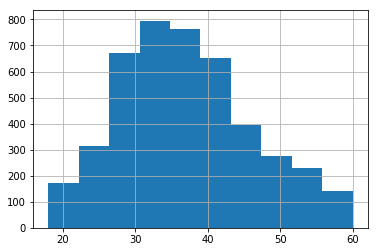

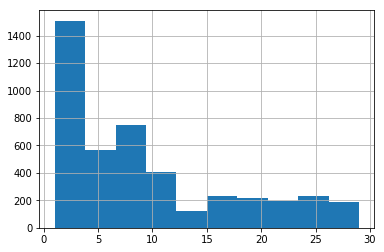

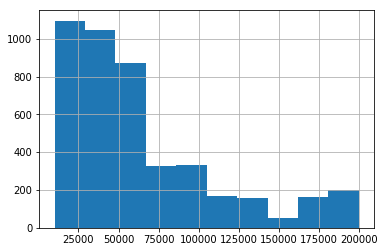

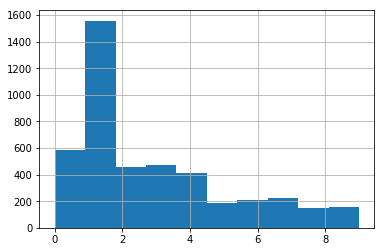

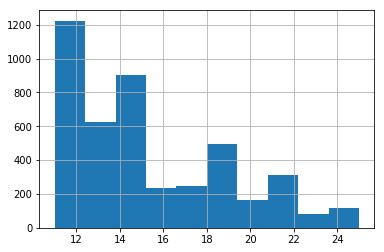

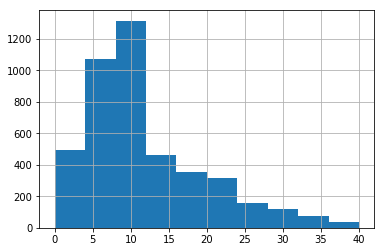

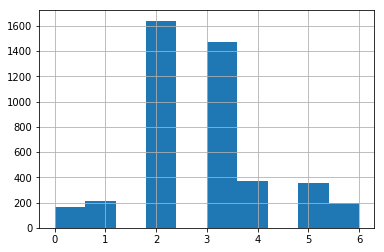

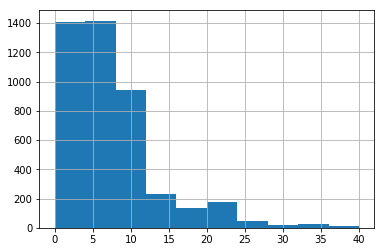

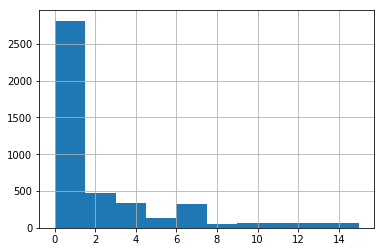

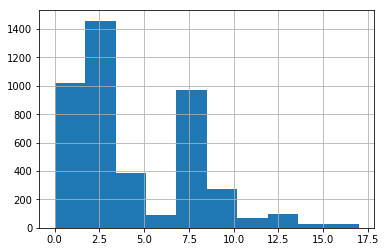

In [546]:
# Use histogram to visualise the skewness of numerical data
for i in continuous_xcols:
    sample[i].hist()
    plt.show()

# All attributes except age has skewness problem

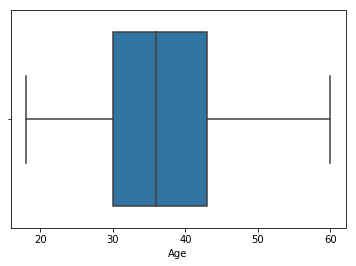

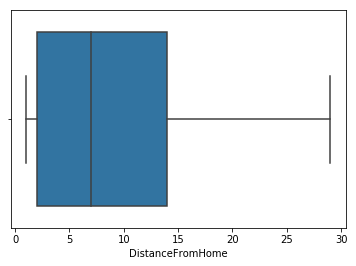

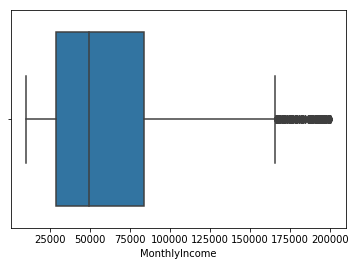

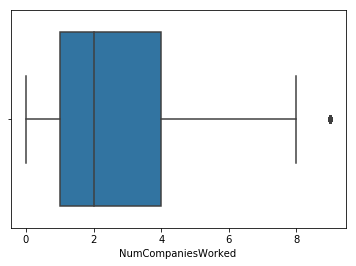

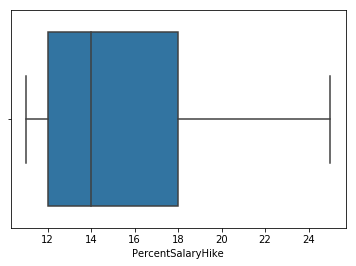

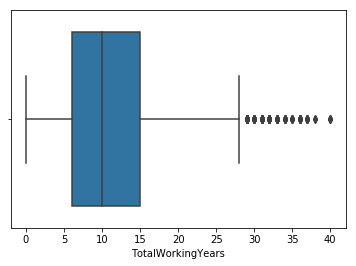

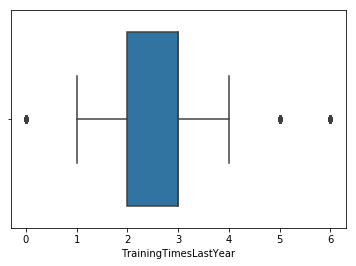

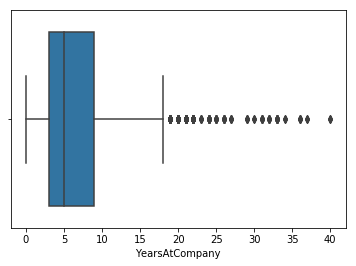

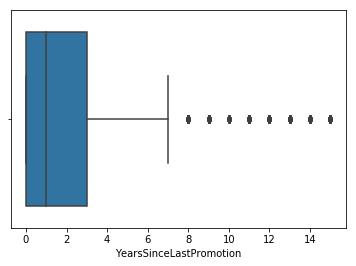

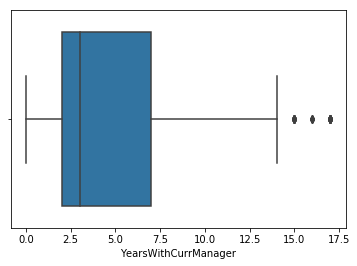

In [547]:
# Use boxplot to visualise the outlier of numerical data
for i in continuous_xcols:
    sns.boxplot(sample[i])
    plt.show()

# outliers in MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion and Years WithCurrManager

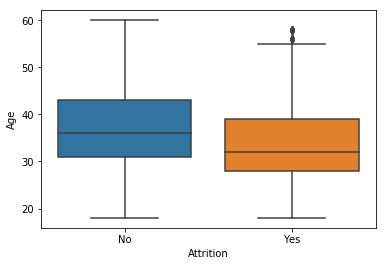

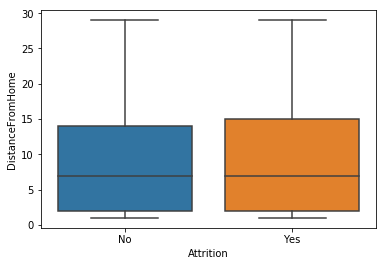

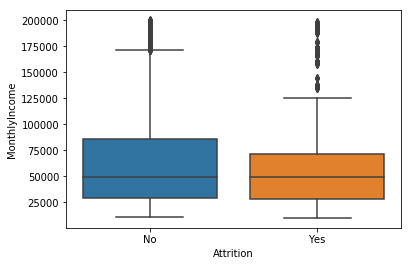

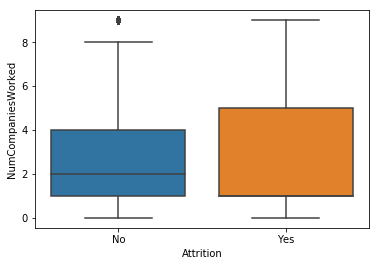

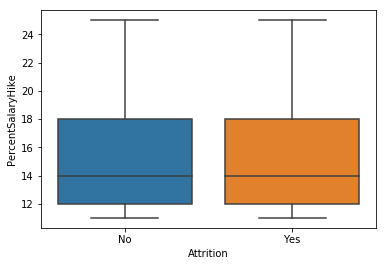

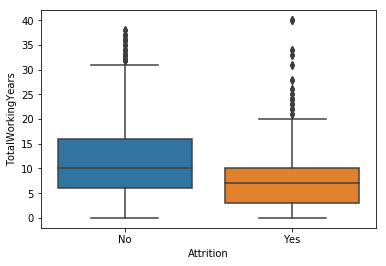

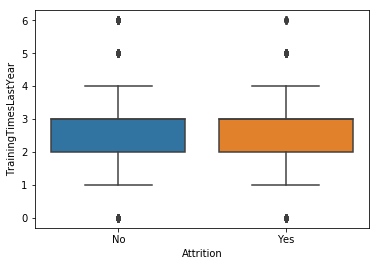

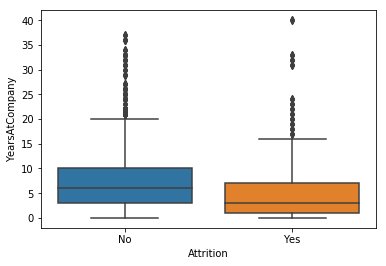

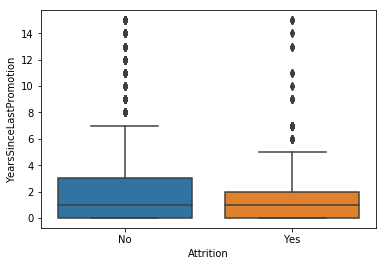

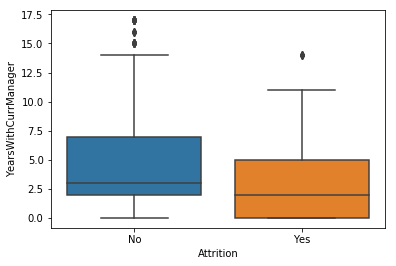

In [548]:
# Use Two-dimensional boxplots to visualize the relationship between numerical data and target variable
for i in continuous_xcols:
    fig, axs = plt.subplots()
    sns.boxplot(x = 'Attrition', y = i, data = sample)

# Features that display differences in different class of target variable are:
# Age, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager, NumCompaniesWorked

In [549]:
# choose the categorical data
continuous_xcols2 = ["BusinessTravel","Department", "Education", "EducationField",
                      "Gender","JobLevel","JobRole", "MaritalStatus", 
                     "StockOptionLevel"]

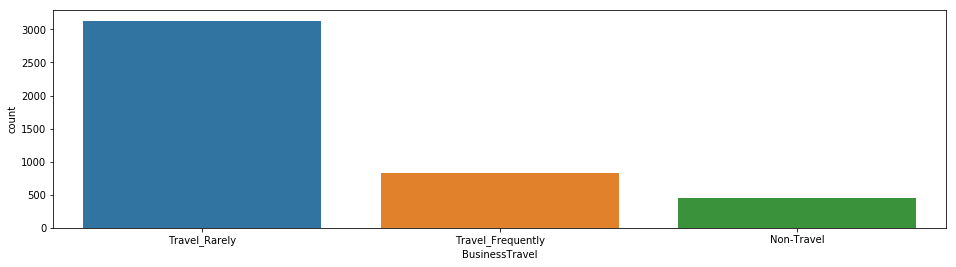

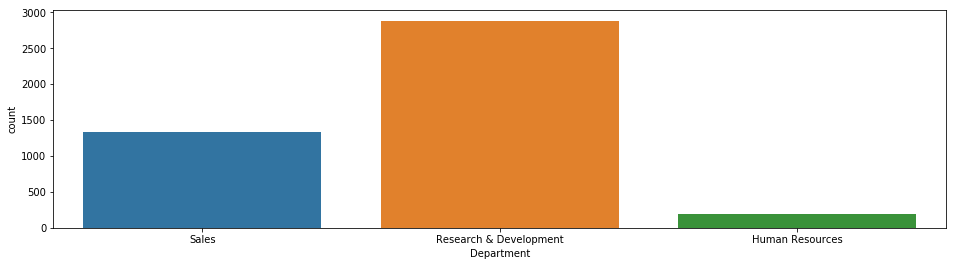

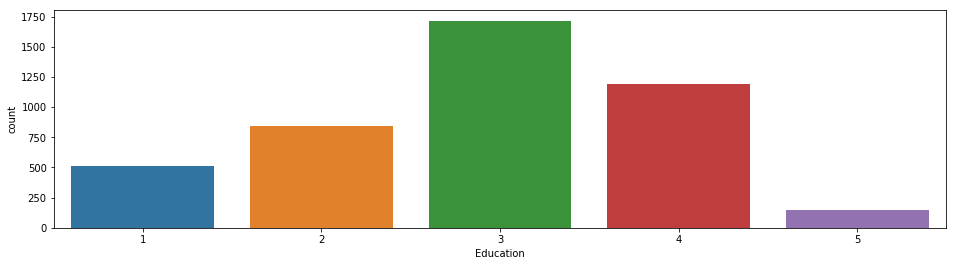

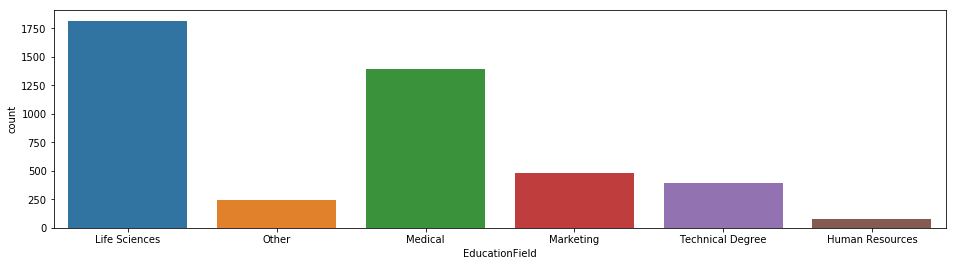

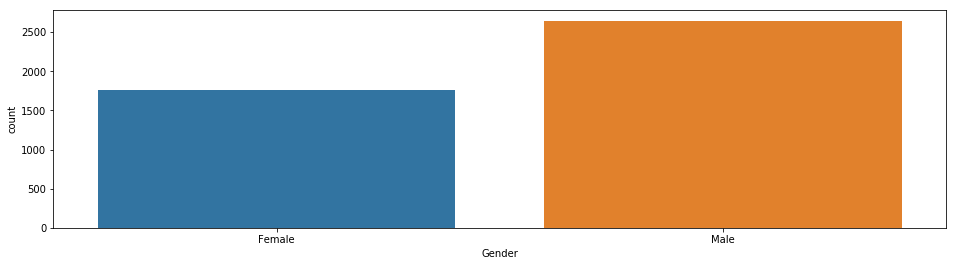

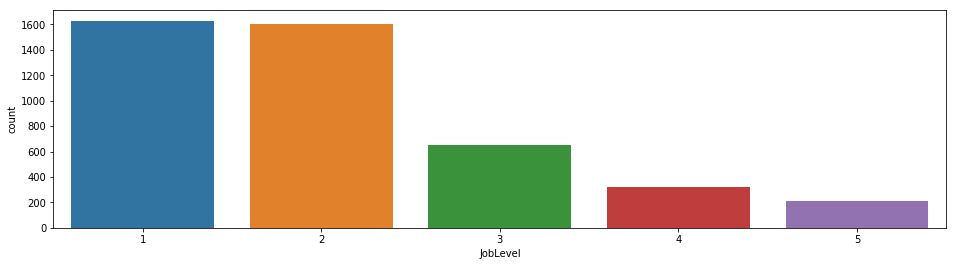

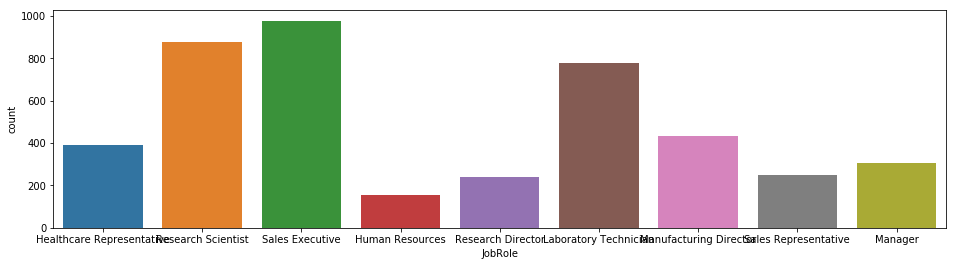

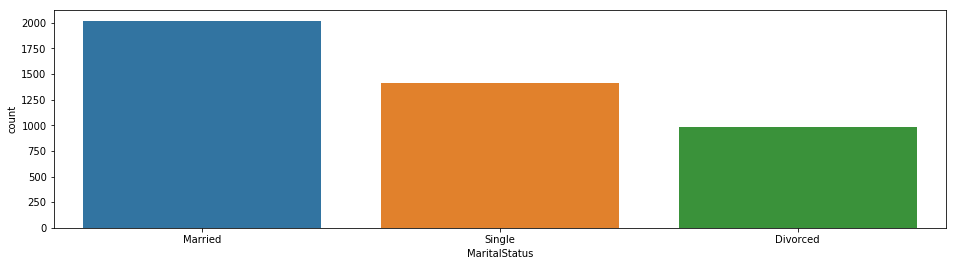

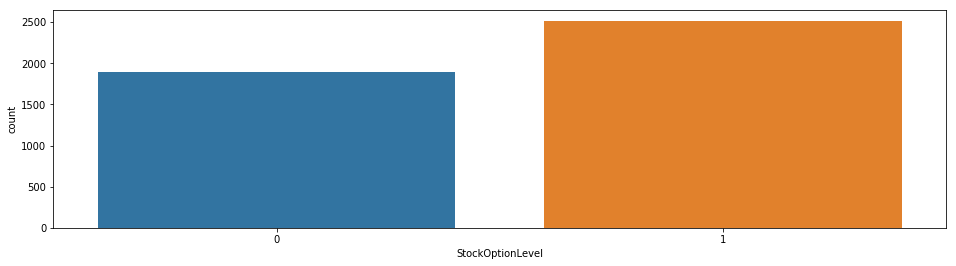

In [550]:
# Use Bar chart to visualise the frequency/class imbalance problem of categorical data
for i in continuous_xcols2:
    fig, axs = plt.subplots()
    sns.countplot(data=sample, x=i)
    fig.set_size_inches(16, 4)

# Features that have relatively bigger class imbalance problem:
# BusinessTravel,Department, JobLevel

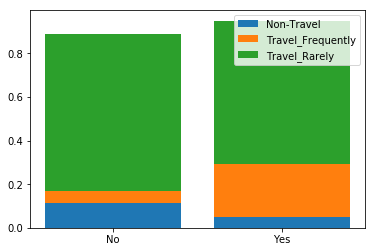

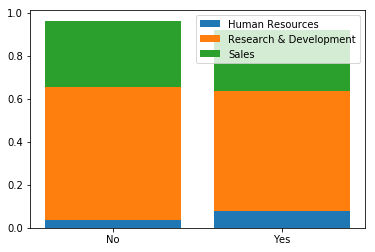

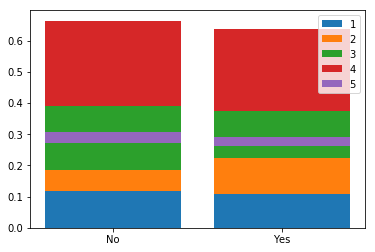

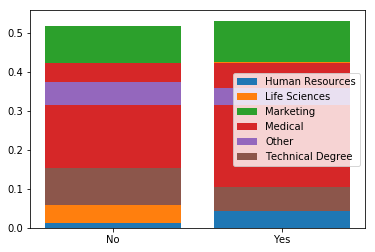

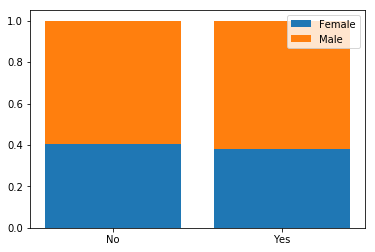

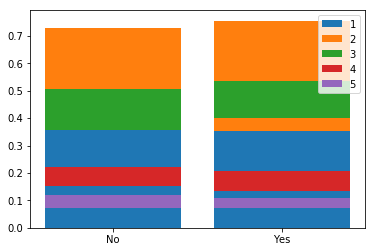

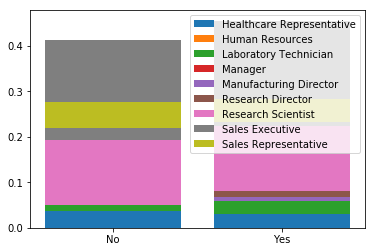

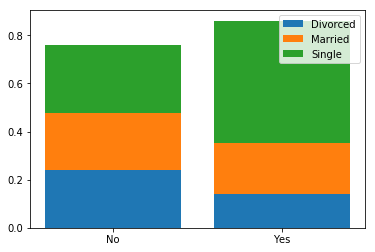

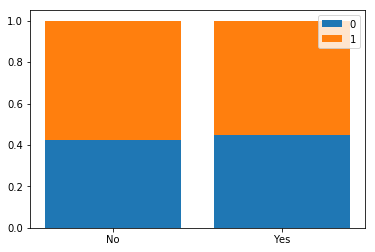

In [551]:
# Use Stacked bar chart to visualise the relationship of categorical data and target variable
for i in continuous_xcols2:
    fig, axs = plt.subplots()
    stacked_bar_chart(sample, 'Attrition', i, True)

# Features that display bigger differences in different class of target variable are:
# BusinessTravel, MaritalStatus

In [552]:
sample['EmployeeCount'].describe()
#should be eliminated, as all are 1

count    4410.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

In [553]:
sample['Over18'].describe()
#should be eliminated, as all are over 18

count     4410
unique       1
top          Y
freq      4410
Name: Over18, dtype: object

In [554]:
sample.insert(0, "Attrition_dummy", 2) 

In [555]:
sample['Attrition_dummy']=[1 if attrition=="Yes" else 0 for attrition in sample['Attrition']]

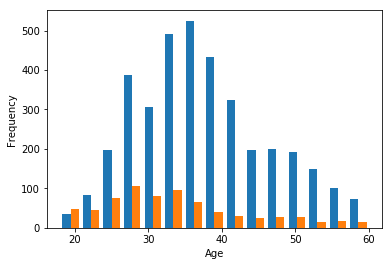

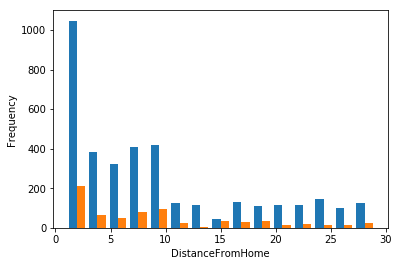

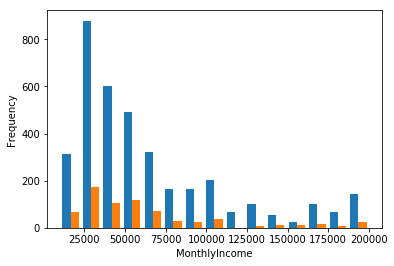

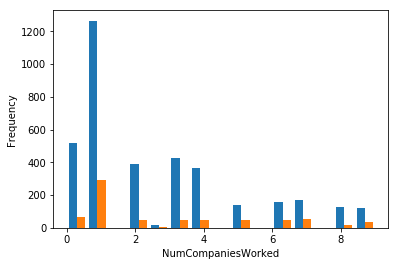

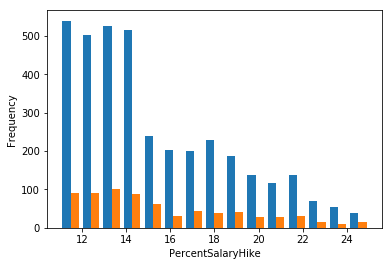

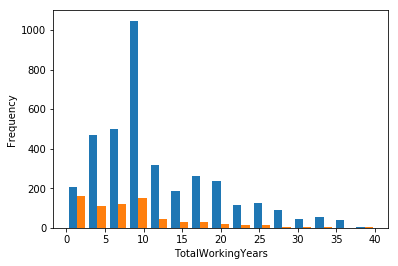

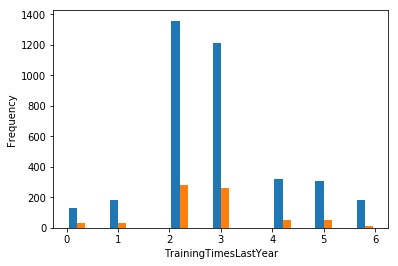

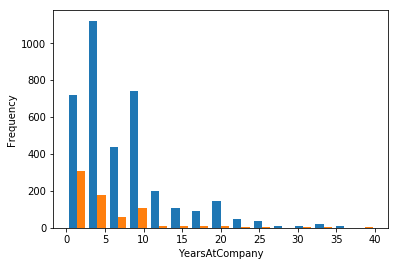

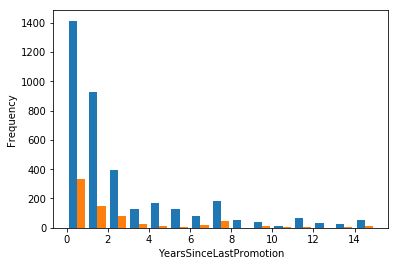

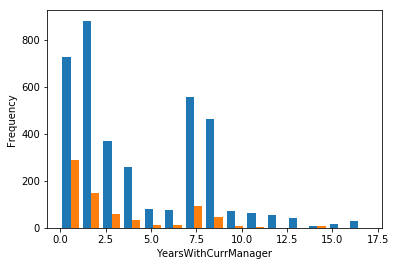

In [556]:
# clearer visualisation of relationship between numerical data and target variable
for i in continuous_xcols:
    non_attrition_list = sample[sample['Attrition_dummy'] == 0][i]
    attrition_list = sample[sample['Attrition_dummy'] == 1][i]
    overall_max = max(non_attrition_list.max(), attrition_list.max())
    overall_min = min(non_attrition_list.min(), attrition_list.min())     
    plt.figure()
    plt.hist([non_attrition_list, attrition_list], bins = 15, range = [overall_min, overall_max])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

## Intime and Outtime (visualisation)
must be after feature engineering

In [557]:
#adding back attrition and Standard hours for comparison
df["Attrition"]=sample["Attrition"]
df["StandardHours"]=sample["StandardHours"]
df['StandardHours'].fillna((df['StandardHours'].mean()), inplace=True)
#changing to numerical
df['Attrition']=(df['Attrition']=='Yes').astype(int)
df['Overtime']=(df['Overtime']=='yes').astype(int)
df.head()

,Days off,Mean hours,Overtime,earliest intime Sd(hr),mean intime Sd(hr),latest outtime Sd(hr),mean outtime Sd(hr),Attrition,StandardHours
1,17,7.373651,0,-0.781355,0.001456,0.534242,-0.325685,0,8
2,13,7.718969,0,-0.789133,-0.011893,1.130631,0.006284,1,8
3,7,7.013240,0,-0.860244,0.025095,0.430075,-0.662457,0,8
4,14,7.193678,0,-0.799133,-0.018136,0.470353,-0.525250,0,8
5,4,8.006175,1,-0.699411,-0.001473,1.666186,0.303910,0,8


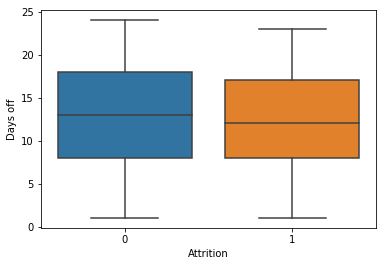

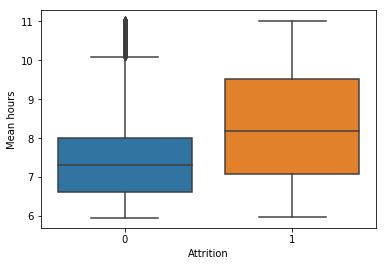

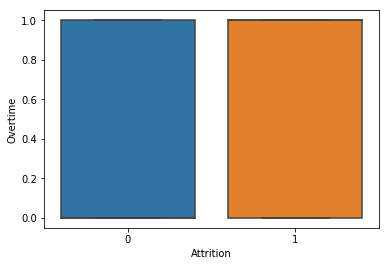

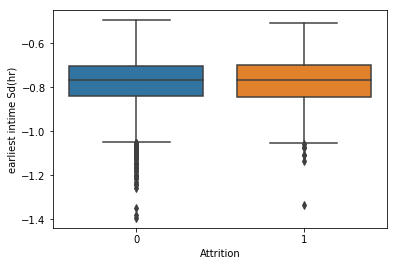

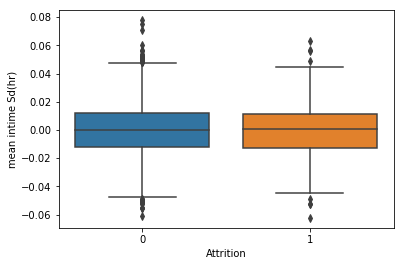

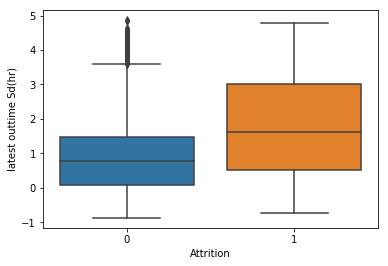

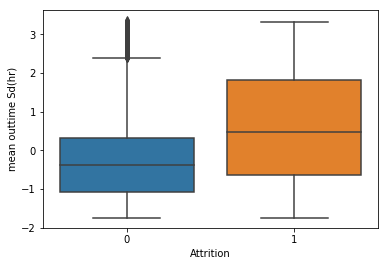

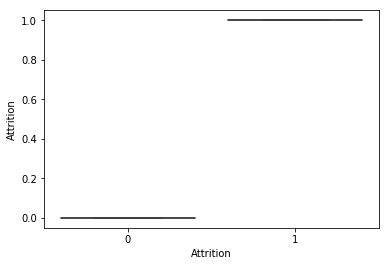

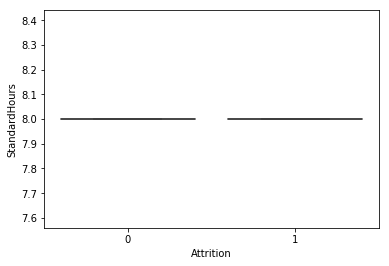

In [558]:
#ploting all as boxplot with relation to attrition
for i in df:
    fig, axs = plt.subplots()
    sns.boxplot(x = 'Attrition', y = i, data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21afc5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a21ddd1d0>]], dtype=object)

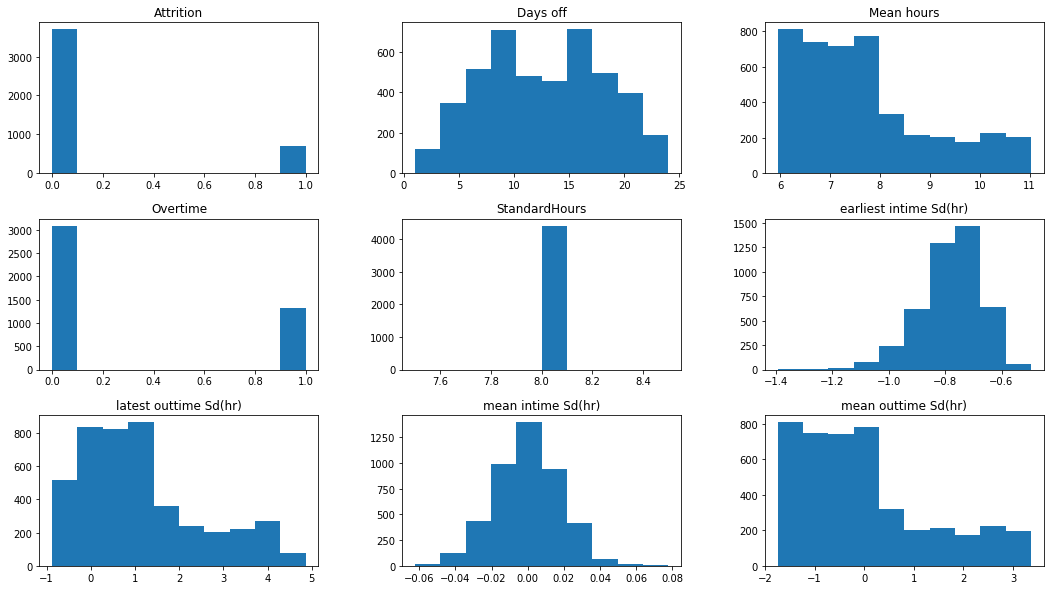

In [559]:
#Plotting hist for all
df.hist(bins=10,figsize=(18,10),grid=False)

In [560]:
df.describe()
#standard hours all are 8, can be eliminated

,Days off,Mean hours,Overtime,earliest intime Sd(hr),mean intime Sd(hr),latest outtime Sd(hr),mean outtime Sd(hr),Attrition,StandardHours
count,4410.000000,4410.000000,4410.00000,4410.000000,4.410000e+03,4410.000000,4.410000e+03,4410.000000,4410.0
mean,12.734694,7.700792,0.30000,-0.778653,4.849970e-15,1.147191,9.449239e-14,0.161224,8.0
std,5.503779,1.340218,0.45831,0.109812,1.814216e-02,1.348461,1.340426e+00,0.367780,0.0
min,1.000000,5.950504,0.00000,-1.393022,-6.240112e-02,-0.875480,-1.750146e+00,0.000000,8.0
25%,8.000000,6.673333,0.00000,-0.841077,-1.213322e-02,0.107575,-1.036523e+00,0.000000,8.0
50%,13.000000,7.406761,0.00000,-0.766355,2.463395e-04,0.874381,-2.924512e-01,0.000000,8.0
75%,17.000000,8.368703,1.00000,-0.700591,1.176245e-02,1.786186,6.603230e-01,0.000000,8.0
max,24.000000,11.030960,1.00000,-0.494966,7.780917e-02,4.866186,3.366508e+00,1.000000,8.0


## Employee and Manager Survey

In [561]:
employee['Attrition']=sample['Attrition']

In [562]:
employee["EnvironmentSatisfaction"]=employee["EnvironmentSatisfaction"].astype(str)
employee["JobSatisfaction"]=employee["JobSatisfaction"].astype(str)
employee["WorkLifeBalance"]=employee["WorkLifeBalance"].astype(str)

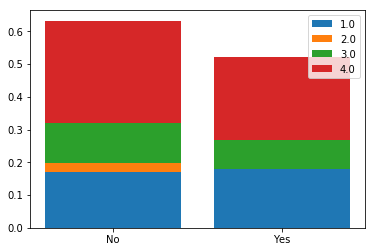

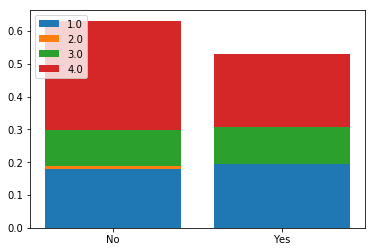

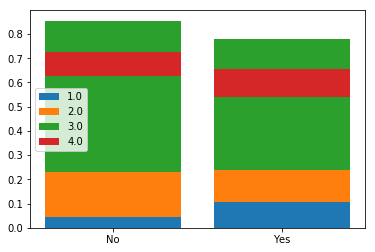

In [563]:
categorical_features_employee = ["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"]
for i in categorical_features_employee:
    fig, axs = plt.subplots()
    stacked_bar_chart(employee,'Attrition',i, True)

In [564]:
manager['Attrition']=sample['Attrition']

In [565]:
manager["JobInvolvement"]=manager["JobInvolvement"].astype(str)
manager["PerformanceRating"]=manager["PerformanceRating"].astype(str)

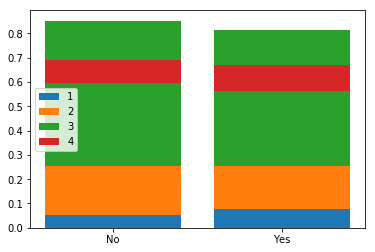

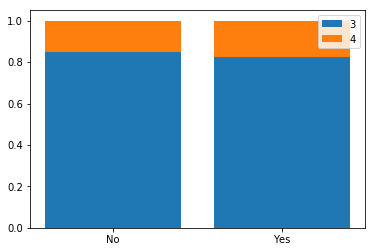

In [566]:
categorical_features_manager = ["JobInvolvement", "PerformanceRating"]
for i in categorical_features_manager:
    fig, axs = plt.subplots()
    stacked_bar_chart(manager,'Attrition',i, True)

In [567]:
manager.drop('Attrition',axis=1,inplace=True)
employee.drop('Attrition',axis=1,inplace=True)

In [568]:
manager["JobInvolvement"]=manager["JobInvolvement"].astype(int)
manager["PerformanceRating"]=manager["PerformanceRating"].astype(int)

# Standardization
- . describe
- standardise features 
- see correlation (general does between)

## General Data

In [569]:
Data.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,StockOption
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,65029.312925,2.447211,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129,...,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,0.570748
std,9.133301,8.105026,47068.888559,2.183267,3.659108,7.774275,1.288978,6.125135,3.221699,3.567327,...,0.254141,0.298211,0.226874,0.399021,0.415483,0.230839,0.415938,0.498274,0.466424,0.495025
min,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,7.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,43.000000,14.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,29.000000,199990.000000,8.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [570]:
standardized_data= pd.DataFrame()
standardized_data["Y"]=sample["Attrition_dummy"]

In [571]:
#standardising features
standardized_data['stdz_Age']=(Data["Age"]-Data["Age"].min())/(Data["Age"].max()-Data["Age"].min())
standardized_data['stdz_DistanceFromHome']=(Data["DistanceFromHome"]-Data["DistanceFromHome"].min())/(Data["DistanceFromHome"].max()-Data["DistanceFromHome"].min())
standardized_data['stdz_MonthlyIncome']=(Data["MonthlyIncome"]-Data["MonthlyIncome"].min())/(Data["MonthlyIncome"].max()-Data["MonthlyIncome"].min())
standardized_data['stdz_NumCompaniesWorked']=(Data["NumCompaniesWorked"]-Data["NumCompaniesWorked"].min())/(Data["NumCompaniesWorked"].max()-Data["NumCompaniesWorked"].min())
standardized_data['stdz_PercentSalaryHike']=(Data["PercentSalaryHike"]-Data["PercentSalaryHike"].min())/(Data["PercentSalaryHike"].max()-Data["PercentSalaryHike"].min())
standardized_data['stdz_TotalWorkingYears']=(Data["TotalWorkingYears"]-Data["TotalWorkingYears"].min())/(Data["TotalWorkingYears"].max()-Data["TotalWorkingYears"].min())
standardized_data['stdz_TrainingTimesLastYear']=(Data["TrainingTimesLastYear"]-Data["TrainingTimesLastYear"].min())/(Data["TrainingTimesLastYear"].max()-Data["TrainingTimesLastYear"].min())
standardized_data['stdz_YearsAtCompany']=(Data["YearsAtCompany"]-Data["YearsAtCompany"].min())/(Data["YearsAtCompany"].max()-Data["YearsAtCompany"].min())
standardized_data['stdz_YearsSinceLastPromotion']=(Data["YearsSinceLastPromotion"]-Data["YearsSinceLastPromotion"].min())/(Data["YearsSinceLastPromotion"].max()-Data["YearsSinceLastPromotion"].min())
standardized_data['stdz_YearsWithCurrManager']=(Data["YearsWithCurrManager"]-Data["YearsWithCurrManager"].min())/(Data["YearsWithCurrManager"].max()-Data["YearsWithCurrManager"].min())

In [572]:
#Tranfer other features to new dataset
standardized_data["No_Business_Travel"]=Data["Non-Travel"]
standardized_data["Rare_Business_Travel"]=Data["Travel_Rarely"]
standardized_data["Frequent_Business_Travel"]=Data["Travel_Frequently"]
standardized_data["Dpmt_Sales"]=Data["Sales"]
standardized_data["Dpmt_RnD"]=Data["RnD"]
standardized_data["Dpmt_HR"]=Data["HR"]
standardized_data["Education_BelowCollege"]=Data["Education_BelowCollege"]
standardized_data["Education_College"]=Data["Education_College"]
standardized_data["Education_Bachelor"]=Data["Education_Bachelor"]
standardized_data["Education_Master"]=Data["Education_Master"]
standardized_data["Education_Doctor"]=Data["Education_Doctor"]
standardized_data["Major_HR"]=Data["Major_HR"]
standardized_data["Major_LIFS"]=Data["Major_LIFS"]
standardized_data["Major_Mark"]=Data["Major_Mark"]
standardized_data["Major_Medic"]=Data["Major_Medi"]
standardized_data["Major_Other"]=Data["Major_Other"]
standardized_data["Major_Techical"]=Data["Major_Techical"]
standardized_data["Male"]=Data["Male"]
standardized_data["JobLevel_1"]=Data["JobLevel1"]
standardized_data["JobLevel_2"]=Data["JobLevel2"]
standardized_data["JobLevel_3"]=Data["JobLevel3"]
standardized_data["JobLevel_4"]=Data["JobLevel4"]
standardized_data["JobLevel_5"]=Data["JobLevel5"]
standardized_data["Role_Healthcare"]=Data["Healthcare Representative"]
standardized_data["Role_HR"]=Data["Human Resources"]
standardized_data["Role_Lab"]=Data["Laboratory Technician"]
standardized_data["Role_Manager"]=Data["Manager"]
standardized_data["Role_Manufacture"]=Data["Manufacturing Director"]
standardized_data["Role_ResearchDirector"]=Data["Research Director"]
standardized_data["Role_ResearchScientist"]=Data["Research Scientist"]
standardized_data["Role_SalesExcutives"]=Data["Sales Executive"]
standardized_data["Role_SalesRep"]=Data["Sales Representative"]
standardized_data["Divorced"]=Data["Divorced"]
standardized_data["Married"]=Data["Married"]
standardized_data["Single"]=Data["Single"]
standardized_data["StockOption"]=Data["StockOption"]

In [573]:
standardized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 47 columns):
Y                               4410 non-null int64
stdz_Age                        4410 non-null float64
stdz_DistanceFromHome           4410 non-null float64
stdz_MonthlyIncome              4410 non-null float64
stdz_NumCompaniesWorked         4410 non-null float64
stdz_PercentSalaryHike          4410 non-null float64
stdz_TotalWorkingYears          4410 non-null float64
stdz_TrainingTimesLastYear      4410 non-null float64
stdz_YearsAtCompany             4410 non-null float64
stdz_YearsSinceLastPromotion    4410 non-null float64
stdz_YearsWithCurrManager       4410 non-null float64
No_Business_Travel              4410 non-null uint8
Rare_Business_Travel            4410 non-null uint8
Frequent_Business_Travel        4410 non-null uint8
Dpmt_Sales                      4410 non-null uint8
Dpmt_RnD                        4410 non-null uint8
Dpmt_HR                         4410 non-

In [574]:
standardized_data.shape

(4410, 47)

## Intime and Outime

In [575]:
#not sure if need as doesnt change the skewness
#df['Mean hours']=(df["Mean hours"]-df["Mean hours"].min())/(df["Mean hours"].max()-df["Mean hours"].min())
#df['earliest intime Sd(hr)']=(df["earliest intime Sd(hr)"]-df["earliest intime Sd(hr)"].min())/(df["earliest intime Sd(hr)"].max()-df["earliest intime Sd(hr)"].min())
#df['latest outtime Sd(hr)']=(df["latest outtime Sd(hr)"]-df["latest outtime Sd(hr)"].min())/(df["latest outtime Sd(hr)"].max()-df["latest outtime Sd(hr)"].min())
#df['mean outtime Sd(hr)']=(df["mean outtime Sd(hr)"]-df["mean outtime Sd(hr)"].min())/(df["mean outtime Sd(hr)"].max()-df["mean outtime Sd(hr)"].min())

# Feature Engineering 


## General Data 

In [576]:
# Create new features
standardized_data['stdz_yearsofpromotion']=standardized_data['stdz_YearsSinceLastPromotion']/standardized_data['stdz_YearsAtCompany']
standardized_data['stdz_currentmanager']=standardized_data['stdz_YearsWithCurrManager']/standardized_data['stdz_YearsAtCompany']
standardized_data['stdz_ageworkingyear']=standardized_data['stdz_TotalWorkingYears']/standardized_data['stdz_Age']

In [577]:
X=['stdz_yearsofpromotion','stdz_currentmanager','stdz_ageworkingyear']

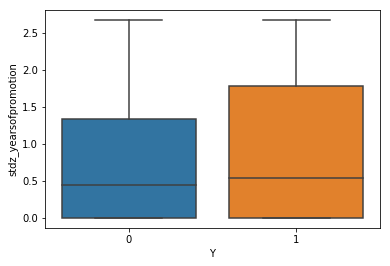

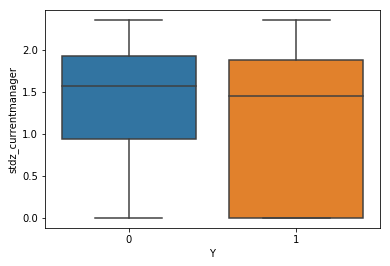

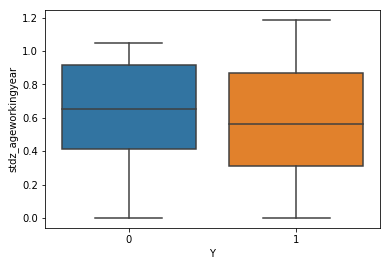

In [578]:
for i in X:
    fig, axs = plt.subplots()
    sns.boxplot(x = 'Y', y = i, data = standardized_data)

In [579]:
standardized_data["stdz_yearsofpromotion"].fillna(standardized_data["stdz_yearsofpromotion"].mean(), inplace=True)
standardized_data["stdz_currentmanager"].fillna(standardized_data["stdz_currentmanager"].mean(), inplace=True)
standardized_data["stdz_ageworkingyear"].fillna(standardized_data["stdz_ageworkingyear"].mean(), inplace=True)

## Intime and Outtime

In [580]:
df.head()

,Days off,Mean hours,Overtime,earliest intime Sd(hr),mean intime Sd(hr),latest outtime Sd(hr),mean outtime Sd(hr),Attrition,StandardHours
1,17,7.373651,0,-0.781355,0.001456,0.534242,-0.325685,0,8
2,13,7.718969,0,-0.789133,-0.011893,1.130631,0.006284,1,8
3,7,7.013240,0,-0.860244,0.025095,0.430075,-0.662457,0,8
4,14,7.193678,0,-0.799133,-0.018136,0.470353,-0.525250,0,8
5,4,8.006175,1,-0.699411,-0.001473,1.666186,0.303910,0,8


## Employee and Manager Survey

##### Manager Survey

In [581]:
#Create a new feature ['Performance ratio']
#If the ratio =1, the employee works equally good this year. 
#If the ratio <1, the employee works worse this year.
#If the ratio>1, the employee improves this year.
manager['Performance ratio']=manager['JobInvolvement']/manager['PerformanceRating']

In [582]:
manager.describe()
#From the mean of ratio ie. 0.874773<1 , you can tell the overall performance of employees has worsen. 

,JobInvolvement,PerformanceRating,Performance ratio
count,4410.000000,4410.000000,4410.000000
mean,2.729932,3.153741,0.874773
std,0.711400,0.360742,0.243125
min,1.000000,3.000000,0.250000
25%,2.000000,3.000000,0.666667
50%,3.000000,3.000000,1.000000
75%,3.000000,3.000000,1.000000
max,4.000000,4.000000,1.333333


### Employee Survey

In [583]:
#Create new features
#Convert before doing feature engineering
employee['EnvironmentSatisfaction']=employee['EnvironmentSatisfaction'].astype(float)
employee['JobSatisfaction']=employee['JobSatisfaction'].astype(float)
employee['WorkLifeBalance']=employee['WorkLifeBalance'].astype(float)
#Build first new feature
employee['Likejob_cal']= employee['JobSatisfaction']-employee['WorkLifeBalance']
#if positive, the employee enjoys work more than his life. 
employee['Likejob']=[1 if x> 0 else 0 for x in employee['Likejob_cal']]
#if 1, the employee enjoys work more than his life. 
#Build second new feature
employee['LikeEnv_cal']= employee['EnvironmentSatisfaction']-employee['WorkLifeBalance']
#if positive, the employee enjoys work environment and that positively benefit the worklifebalance.
employee['LikeEnv']=[1 if x> 0 else 0 for x in employee['LikeEnv_cal']]
#if 1, the employee enjoys work environment and that positively benefit the worklifebalance.
#Build third new feature
employee['Compare_cal']= employee['JobSatisfaction']-employee['EnvironmentSatisfaction']
#if positive, the employee enjoys work itself more, instead of the environment.
employee['Lovejob']=[1 if x> 0 else 0 for x in employee['Compare_cal']]
#if 1, the employee enjoys work itself more, instead of the environment.
#Build forth new feature
employee['Likelevel']=employee['Likejob']+employee['LikeEnv']+employee['Lovejob']
#This gives an aggregated job satisfaction level.
#Build fifth new feature
employee['LifeSatisfaction']= employee['WorkLifeBalance']*(employee['EnvironmentSatisfaction']+employee['JobSatisfaction'])
#Guess the life satisfaction level
#Build sixth new feature
employee['Ex_LifeSatisfaction']= employee['LifeSatisfaction']*employee['Likejob']
#Get the according life satisfaction level if the employee enjoys work more than life.

In [584]:
employee.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Likejob_cal,Likejob,LikeEnv_cal,LikeEnv,Compare_cal,Lovejob,Likelevel,LifeSatisfaction,Ex_LifeSatisfaction
EmployeeID,,,,,,,,,,,,
1,3.0,4.0,2.0,2.0,1,1.0,1,1.0,1,3,14.0,14.0
2,3.0,2.0,4.0,-2.0,0,-1.0,0,-1.0,0,0,20.0,0.0
3,2.0,2.0,1.0,1.0,1,1.0,1,0.0,0,2,4.0,4.0
4,4.0,4.0,3.0,1.0,1,1.0,1,0.0,0,2,24.0,24.0
5,4.0,1.0,3.0,-2.0,0,1.0,1,-3.0,0,1,15.0,0.0


In [585]:
#Drop irrelevant features
employee_cleaned= employee.drop(['Likejob_cal','LikeEnv_cal','Compare_cal'],axis=1)

In [586]:
# Convert the features from numerical to categorical 
employee_cleaned['Likejob']=employee_cleaned['Likejob'].astype(str)
employee_cleaned['LikeEnv']=employee_cleaned['LikeEnv'].astype(str)
employee_cleaned['Lovejob']=employee_cleaned['Lovejob'].astype(str)

# Feature Selection


### General Data

In [587]:
#Make a class-balanced data set 
general_stay=pd.DataFrame()
index=standardized_data[standardized_data['Y']==0].index
general_index=np.random.choice(index,711,replace=False) # try to get different customers without replacement
general_stay=standardized_data.loc[general_index,:]
general_stay.head()

,Y,stdz_Age,stdz_DistanceFromHome,stdz_MonthlyIncome,stdz_NumCompaniesWorked,stdz_PercentSalaryHike,stdz_TotalWorkingYears,stdz_TrainingTimesLastYear,stdz_YearsAtCompany,stdz_YearsSinceLastPromotion,...,Role_ResearchScientist,Role_SalesExcutives,Role_SalesRep,Divorced,Married,Single,StockOption,stdz_yearsofpromotion,stdz_currentmanager,stdz_ageworkingyear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
3676,0,0.166667,0.214286,0.063560,0.250,0.142857,0.150,0.333333,0.075,0.066667,...,0,1,0,0,1,0,1,0.888889,1.568627,0.900000
1088,0,0.404762,0.035714,0.044760,0.000,1.000000,0.100,0.333333,0.075,0.000000,...,0,0,0,0,1,0,1,0.000000,1.568627,0.247059
4072,0,0.309524,0.857143,0.897946,0.125,0.214286,0.250,0.333333,0.250,0.533333,...,0,0,0,0,1,0,1,2.133333,1.647059,0.807692
2505,0,0.500000,0.035714,0.218325,0.250,0.500000,0.175,0.500000,0.050,0.133333,...,0,0,0,1,0,0,1,2.666667,2.352941,0.350000
4376,0,0.476190,0.000000,0.287678,0.000,0.071429,0.425,0.666667,0.400,0.333333,...,0,0,0,1,0,0,0,0.833333,1.911765,0.892500


In [588]:
general_left=pd.DataFrame()
index_1=standardized_data[standardized_data['Y']==1].index
general_left=standardized_data.loc[index_1,:]
general_left.head()
balanced_general=general_stay.append(general_left)
print("New data shape is: ", balanced_general.shape)
print("Number of '1's in 'Y' column is: ", balanced_general['Y'].sum())
balanced_general.head()

New data shape is:  (1422, 50)
Number of '1's in 'Y' column is:  711


,Y,stdz_Age,stdz_DistanceFromHome,stdz_MonthlyIncome,stdz_NumCompaniesWorked,stdz_PercentSalaryHike,stdz_TotalWorkingYears,stdz_TrainingTimesLastYear,stdz_YearsAtCompany,stdz_YearsSinceLastPromotion,...,Role_ResearchScientist,Role_SalesExcutives,Role_SalesRep,Divorced,Married,Single,StockOption,stdz_yearsofpromotion,stdz_currentmanager,stdz_ageworkingyear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
3676,0,0.166667,0.214286,0.063560,0.250,0.142857,0.150,0.333333,0.075,0.066667,...,0,1,0,0,1,0,1,0.888889,1.568627,0.900000
1088,0,0.404762,0.035714,0.044760,0.000,1.000000,0.100,0.333333,0.075,0.000000,...,0,0,0,0,1,0,1,0.000000,1.568627,0.247059
4072,0,0.309524,0.857143,0.897946,0.125,0.214286,0.250,0.333333,0.250,0.533333,...,0,0,0,0,1,0,1,2.133333,1.647059,0.807692
2505,0,0.500000,0.035714,0.218325,0.250,0.500000,0.175,0.500000,0.050,0.133333,...,0,0,0,1,0,0,1,2.666667,2.352941,0.350000
4376,0,0.476190,0.000000,0.287678,0.000,0.071429,0.425,0.666667,0.400,0.333333,...,0,0,0,1,0,0,0,0.833333,1.911765,0.892500


In [589]:
#Preprocessing for modelling 
# define independent variables / attirbutes / features
balanced_general_features= balanced_general.drop(['Y'],axis=1)
# define one single target variable / label
target = ['Y']
# get defined training dataset
A = balanced_general_features
b = balanced_general[target]

In [590]:
balanced_general.isnull().sum()

Y                               0
stdz_Age                        0
stdz_DistanceFromHome           0
stdz_MonthlyIncome              0
stdz_NumCompaniesWorked         0
stdz_PercentSalaryHike          0
stdz_TotalWorkingYears          0
stdz_TrainingTimesLastYear      0
stdz_YearsAtCompany             0
stdz_YearsSinceLastPromotion    0
stdz_YearsWithCurrManager       0
No_Business_Travel              0
Rare_Business_Travel            0
Frequent_Business_Travel        0
Dpmt_Sales                      0
Dpmt_RnD                        0
Dpmt_HR                         0
Education_BelowCollege          0
Education_College               0
Education_Bachelor              0
Education_Master                0
Education_Doctor                0
Major_HR                        0
Major_LIFS                      0
Major_Mark                      0
Major_Medic                     0
Major_Other                     0
Major_Techical                  0
Male                            0
JobLevel_1    

#### Feature Selection by decision tree model

In [591]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
depths = np.arange(1, 10)
num_leafs = [5, 10, 20, 50, 100]
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs}]
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(A,b)
#find the best parameters
DTM.best_params_

{'max_depth': 9, 'max_leaf_nodes': 100}

In [592]:
general_model = DecisionTreeClassifier(max_leaf_nodes = 100, max_depth =9, random_state=10)
general_model.fit(A,b)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [593]:
# import evaluation tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(general_model, A, b, cv=10)  
pred_b = cross_val_predict(general_model, A, b, cv=10)
yact = b.values.ravel()
proba_b = cross_val_predict(general_model, A, yact, cv=10, method='predict_proba')
proba_b_0 = proba_b[:,0]
proba_b_0_= [0 if i >= 0.4 else 1 for i in proba_b_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_b_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.88342620781332526

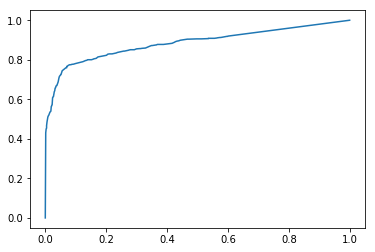

In [594]:
plt.plot(fpr,tpr)

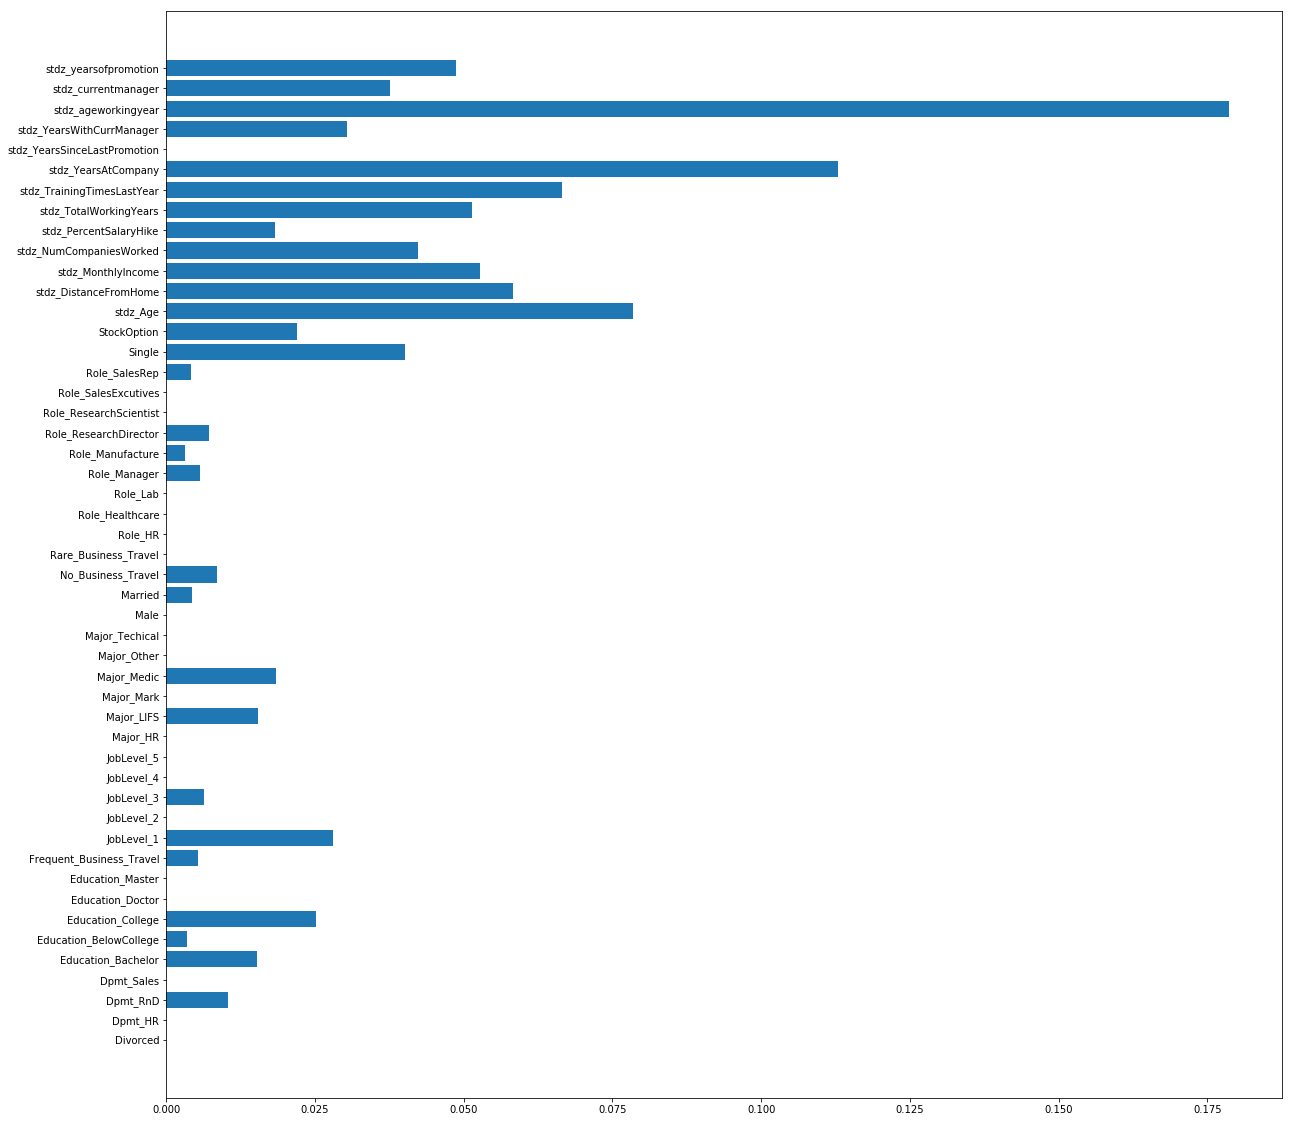

In [595]:
#Evaluate the importance of features
importance = pd.DataFrame()
i = 0
for col in A.columns:
    importance[col] = [general_model.feature_importances_[i]] #it automcatically calculates the importance. 
    i += 1
importance = importance.transpose()
importance.columns= ['Feature Importance']
plt.figure(figsize=(20, 20))
plt.barh(importance.index, importance['Feature Importance'])
plt.show()

From the above, we can tell 
- "stdz_NumCompaniesWorked",
- "Single",
- "stdz_yearsofpromotion", 
- "stdz_YearsAtCompany",
- "stdz_PercentSalaryHike", 
- "stdz_Age",
- "stdz_TotalWorkingYears",
- "stdz_TrainingTimesLastYear",
- "stdz_ageworkingyear", 
- "stdz_MonthlyIncome",
- "stdz_DistanceFromHome",
- "Role_SalesRep" 
are important attributes. 
We will drop the others afterwards as they show less importance. 

## Decision Tree Model (12 features)

In [596]:
# define independent variables / attirbutes / features 
# drop travel higher AUC than drop Education
#12 features
balanced_general_features = ["stdz_NumCompaniesWorked","Single","stdz_yearsofpromotion", "stdz_YearsAtCompany",
                             "stdz_PercentSalaryHike", "stdz_Age","stdz_TotalWorkingYears","stdz_TrainingTimesLastYear",
                             "stdz_ageworkingyear", "stdz_MonthlyIncome","stdz_DistanceFromHome","Role_SalesRep"]
A = balanced_general[balanced_general_features]
# define one single target variable / label
target = ['Y']
b = balanced_general[target]

In [597]:
generalmodel = DecisionTreeClassifier(max_leaf_nodes = 100, max_depth = 9, random_state=10)

In [598]:
generalmodel.fit(A,b)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [599]:
score_cv = cross_val_score(generalmodel, A, b, cv=10)

In [600]:
pred_b = cross_val_predict(generalmodel, A, b, cv=10)

In [601]:
bact = b.values.ravel()

In [602]:
proba_b = cross_val_predict(generalmodel, A, bact, cv=10, method='predict_proba')

In [603]:
proba_b_1 = proba_b[:,0]

In [604]:
proba_b_1_= [0 if i >= 0.4 else 1 for i in proba_b_1]

In [605]:
fpr, tpr, thresholds = metrics.roc_curve(bact,proba_b_1,pos_label=0)

In [606]:
metrics.auc(fpr, tpr) #area under the ROC curve 

0.87566095177054959

#### Feature Selection by logistic regression model

In [607]:
#Preprocessing for modelling 
# define independent variables / attirbutes / features
balanced_general_features= balanced_general.drop(['Y'],axis=1)
# define one single target variable / label
target = ['Y']
# get defined training dataset
E = balanced_general_features
f = balanced_general[target]

In [608]:
import warnings
warnings.filterwarnings("ignore")
# import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='saga')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# change target column to array
yact = f.values.ravel()
score_cv = cross_val_score(lr, E, yact, cv=10)
score_cv.mean()

0.66235328638497637

In [609]:
pred_f = cross_val_predict(lr, E, yact, cv=10)
print(confusion_matrix(b, pred_b))

[[535 176]
 [ 69 642]]


In [610]:
print(classification_report(yact, pred_f))

             precision    recall  f1-score   support

          0       0.67      0.65      0.66       711
          1       0.66      0.67      0.67       711

avg / total       0.66      0.66      0.66      1422



In [611]:
proba_y = cross_val_predict(lr, E, yact, cv=10, method='predict_proba')
lr.fit(E, yact)
lr.intercept_
coeff_df = pd.DataFrame(lr.coef_.flatten(), E.columns, columns=['Coefficient'])  
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
stdz_NumCompaniesWorked,1.039816
Single,0.922204
Major_HR,0.828460
stdz_YearsSinceLastPromotion,0.736113
Frequent_Business_Travel,0.641116
Role_ResearchDirector,0.626323
Dpmt_HR,0.433430
stdz_PercentSalaryHike,0.267559
Role_SalesRep,0.207108
stdz_yearsofpromotion,0.200084


From the above, we can tell 
- stdz_YearsSinceLastPromotion
- stdz_NumCompaniesWorked
- Dpmt_HR
- Single
- Frequent_Business_Travel
- stdz_ageworkingyear
- No_Business_Travel
- Role_Manufacture
- stdz_YearsWithCurrManager
- stdz_TrainingTimesLastYear
- stdz_Age
- stdz_TotalWorkingYears
are more useful attributes. Combine with the feature selection result in decision tree, we will drop the less relevant attributes.

In [612]:
#Check how many features are in use
coeff_df['Coefficient']=coeff_df['Coefficient'].astype(str)
coeff_df.describe()

,Coefficient
count,49
unique,41
top,0.0
freq,9


Evaluation by AUC

In [613]:
# import evaluation tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
#ROC curve
proba_b = cross_val_predict(lr, A, yact, cv=10, method='predict_proba')
proba_b_0 = proba_b[:,0]
proba_b_0_= [0 if i >= 0.4 else 1 for i in proba_b_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_b_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve

0.68918996441295222

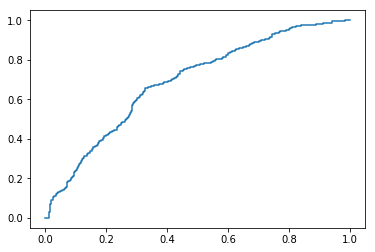

In [614]:
plt.plot(fpr,tpr)

#### Finalize the data set with selected features

The selected features combined from Decision Tree and Logistic Regression are as follows:

In [615]:
#Create a finalized survey dataset with only important features.
#"LikeEnv", "WorkLifeBalance","Performance ratio" ,"EnvironmentSatisfaction","LifeSatisfaction"
general_finalized=pd.DataFrame()
general_finalized["Y"]= standardized_data["Y"]
general_finalized["stdz_YearsSinceLastPromotion"]= standardized_data["stdz_YearsSinceLastPromotion"]
general_finalized["stdz_NumCompaniesWorked"]= standardized_data["stdz_NumCompaniesWorked"]
general_finalized["Dpmt_HR"]= standardized_data["Dpmt_HR"]
general_finalized["Single"]= standardized_data["Single"]
general_finalized["Frequent_Business_Travel"]= standardized_data["Frequent_Business_Travel"]
general_finalized["stdz_ageworkingyear"]= standardized_data["stdz_ageworkingyear"]
general_finalized["Role_Manufacture"]= standardized_data["Role_Manufacture"]
general_finalized["stdz_YearsWithCurrManager"]= standardized_data["stdz_YearsWithCurrManager"]
general_finalized["stdz_TrainingTimesLastYear"]= standardized_data["stdz_TrainingTimesLastYear"]
general_finalized["stdz_Age"]= standardized_data["stdz_Age"]
general_finalized["stdz_TotalWorkingYears"]= standardized_data["stdz_TotalWorkingYears"]
general_finalized["stdz_yearsofpromotion"]= standardized_data["stdz_yearsofpromotion"]
general_finalized["stdz_YearsAtCompany"]= standardized_data["stdz_YearsAtCompany"]
general_finalized["stdz_PercentSalaryHike"]= standardized_data["stdz_PercentSalaryHike"]
general_finalized["stdz_MonthlyIncome"]= standardized_data["stdz_MonthlyIncome"]
general_finalized["stdz_DistanceFromHome"]= standardized_data["stdz_DistanceFromHome"]
general_finalized["Role_SalesRep"]= standardized_data["Role_SalesRep"]

general_finalized.head()

,Y,stdz_YearsSinceLastPromotion,stdz_NumCompaniesWorked,Dpmt_HR,Single,Frequent_Business_Travel,stdz_ageworkingyear,Role_Manufacture,stdz_YearsWithCurrManager,stdz_TrainingTimesLastYear,stdz_Age,stdz_TotalWorkingYears,stdz_yearsofpromotion,stdz_YearsAtCompany,stdz_PercentSalaryHike,stdz_MonthlyIncome,stdz_DistanceFromHome,Role_SalesRep
EmployeeID,,,,,,,,,,,,,,,,,,
1,0,0.000000,0.125,0,0,0,0.031818,0,0.000000,1.000000,0.785714,0.025,0.000000,0.025,0.000000,0.637546,0.178571,0
2,1,0.066667,0.000,0,1,1,0.484615,0,0.235294,0.500000,0.309524,0.150,0.533333,0.125,0.857143,0.167457,0.321429,0
3,0,0.000000,0.125,0,0,1,0.375000,0,0.176471,0.333333,0.333333,0.125,0.000000,0.125,0.285714,0.964666,0.571429,0
4,0,0.466667,0.375,0,0,0,0.682500,0,0.294118,0.833333,0.476190,0.325,2.333333,0.200,0.000000,0.385045,0.035714,0
5,0,0.000000,0.500,0,1,0,0.675000,0,0.235294,0.333333,0.333333,0.225,0.000000,0.150,0.071429,0.070195,0.321429,0


### Intime and Outtime

In [616]:
df.head()

,Days off,Mean hours,Overtime,earliest intime Sd(hr),mean intime Sd(hr),latest outtime Sd(hr),mean outtime Sd(hr),Attrition,StandardHours
1,17,7.373651,0,-0.781355,0.001456,0.534242,-0.325685,0,8
2,13,7.718969,0,-0.789133,-0.011893,1.130631,0.006284,1,8
3,7,7.013240,0,-0.860244,0.025095,0.430075,-0.662457,0,8
4,14,7.193678,0,-0.799133,-0.018136,0.470353,-0.525250,0,8
5,4,8.006175,1,-0.699411,-0.001473,1.666186,0.303910,0,8


In [617]:
time_set =df.drop(["Attrition","StandardHours"],axis=1)
time_set['Y']=df['Attrition']
#Make a class-balanced data set 
time_stay=pd.DataFrame()
index2=time_set[time_set['Y']==0].index
sampled_index2=np.random.choice(index2,711,replace=False) # try to get different customers without replacement
time_stay=time_set.loc[sampled_index2,:]
time_stay.head()
time_left=pd.DataFrame()
index_2=time_set[time_set['Y']==1].index
time_left=time_set.loc[index_2,:]
time_left.head()
balanced_time=time_stay.append(time_left)
print("New data shape is: ", balanced_time.shape)
print("Number of '1's in 'Y' column is: ", balanced_time['Y'].sum())
balanced_time.head()

New data shape is:  (1422, 8)
Number of '1's in 'Y' column is:  711


,Days off,Mean hours,Overtime,earliest intime Sd(hr),mean intime Sd(hr),latest outtime Sd(hr),mean outtime Sd(hr),Y
1020,4,10.019207,1,-0.852466,0.007205,3.477575,2.325621,0
9,19,7.236499,0,-0.688855,0.022553,0.707575,-0.441740,0
1287,19,7.179871,0,-0.887466,0.002435,0.432575,-0.518486,0
2690,15,6.396686,0,-0.705800,-0.018346,0.158686,-1.322452,0
4294,6,7.431107,0,-0.731077,-0.037153,0.727020,-0.306838,0


In [618]:
#Preprocessing for modelling 
time_set_features= time_set.drop(['Y'],axis=1)
target = ['Y']
X= time_set_features
y = time_set[target]

In [619]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
depths = np.arange(1, 10)
num_leafs = [5, 10, 20, 50, 100]
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs}]
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)
#best parameters
DTM.best_params_

{'max_depth': 3, 'max_leaf_nodes': 5}

In [620]:
my_model = DecisionTreeClassifier(max_leaf_nodes = 10, max_depth = 4, random_state=10)
my_model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [621]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(my_model, X, y, cv=10)  
pred_y = cross_val_predict(my_model, X, y, cv=10)
yact = y.values.ravel()
proba_y = cross_val_predict(my_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.63642623600326842

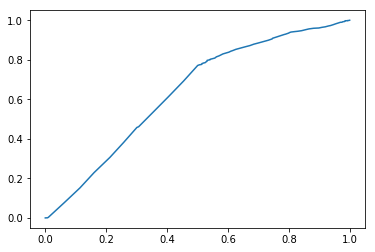

In [622]:
plt.plot(fpr,tpr)

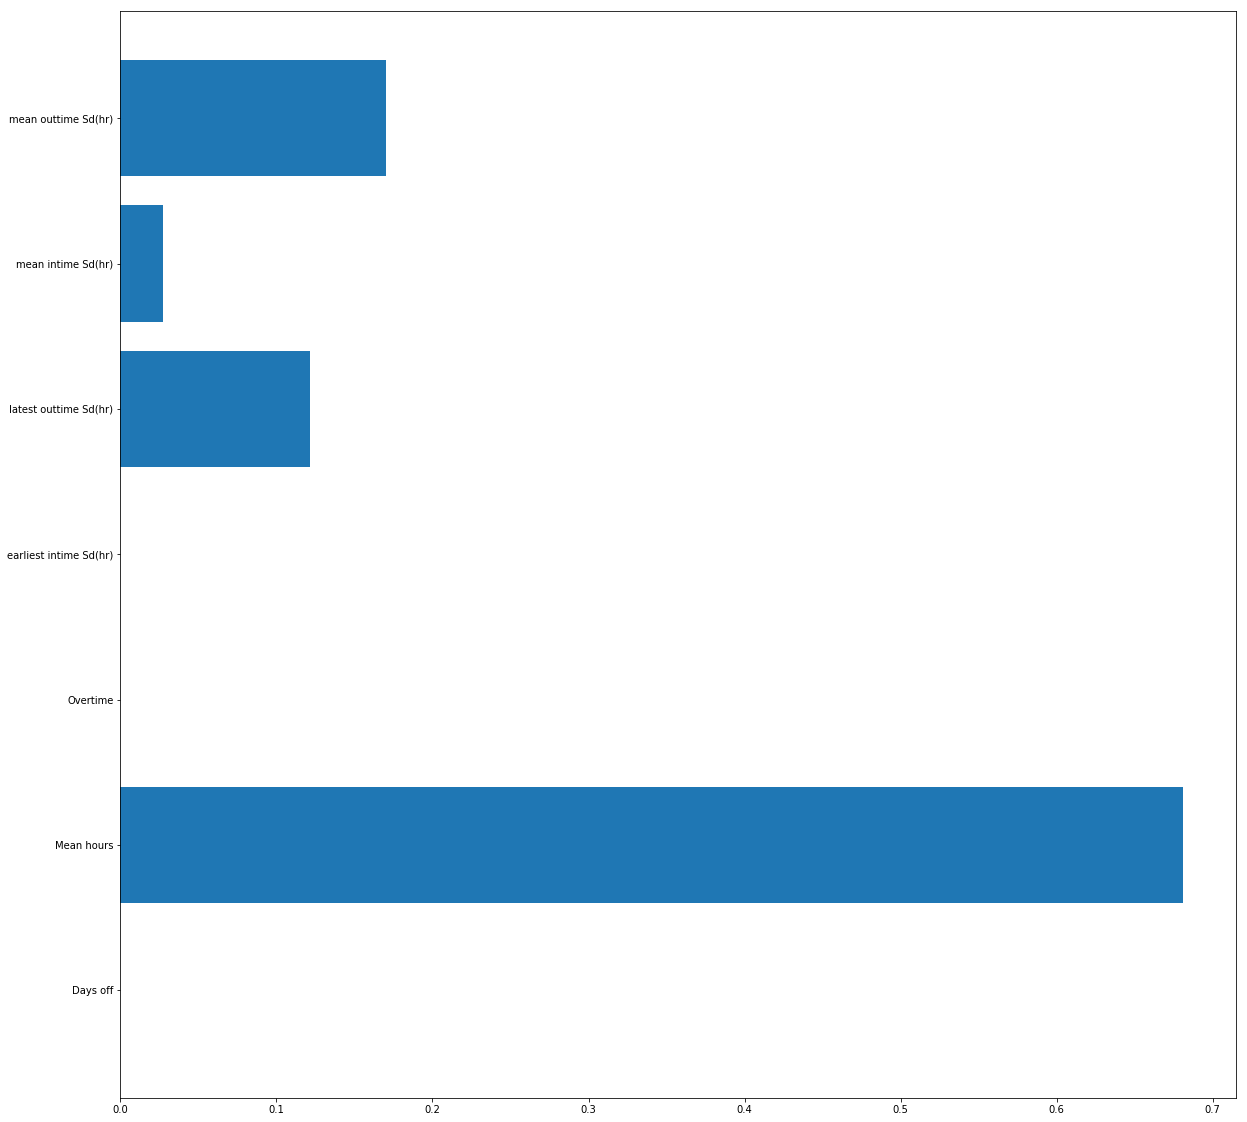

In [623]:
#Evaluate the importance of features
importance = pd.DataFrame()
i = 0
for col in X.columns:
    importance[col] = [my_model.feature_importances_[i]] #it automcatically calculates the importance. 
    i += 1
importance = importance.transpose()
importance.columns= ['Feature Importance']
plt.figure(figsize=(20, 20))
plt.barh(importance.index, importance['Feature Importance'])
plt.show()

In [624]:
importance

,Feature Importance
Days off,0.000000
Mean hours,0.681222
Overtime,0.000000
earliest intime Sd(hr),0.000000
mean intime Sd(hr),0.026959
latest outtime Sd(hr),0.121401
mean outtime Sd(hr),0.170419


In [625]:
#feature selection by logistic regression
import warnings
warnings.filterwarnings("ignore")
# import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='saga')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# change target column to array
yact = y.values.ravel()
score_cv = cross_val_score(lr, X, yact, cv=10)
score_cv.mean()

0.83877585766241225

In [626]:
pred_y = cross_val_predict(lr, X, yact, cv=10)
print(confusion_matrix(y, pred_y))

[[3699    0]
 [ 711    0]]


In [627]:
print(classification_report(yact, pred_y))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      3699
          1       0.00      0.00      0.00       711

avg / total       0.70      0.84      0.77      4410



In [628]:
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
lr.fit(X, yact)
lr.intercept_
coeff_df = pd.DataFrame(lr.coef_.flatten(), X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Overtime,1.045386
mean outtime Sd(hr),0.340089
earliest intime Sd(hr),0.132630
Days off,0.003293
mean intime Sd(hr),0.000000
latest outtime Sd(hr),-0.027279
Mean hours,-0.240331


In [629]:
coeff_df['Coefficient']=coeff_df['Coefficient'].astype(str)
coeff_df.describe()

,Coefficient
count,7
unique,7
top,1.04538642766
freq,1


In [630]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
#ROC curve
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve

0.63635019005782911

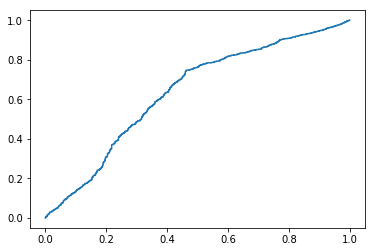

In [631]:
plt.plot(fpr,tpr)

In [632]:
# final dataset
final_df=df.drop(["Days off","mean intime Sd(hr)","Attrition","StandardHours"],axis=1)
final_df.head()

,Mean hours,Overtime,earliest intime Sd(hr),latest outtime Sd(hr),mean outtime Sd(hr)
1,7.373651,0,-0.781355,0.534242,-0.325685
2,7.718969,0,-0.789133,1.130631,0.006284
3,7.013240,0,-0.860244,0.430075,-0.662457
4,7.193678,0,-0.799133,0.470353,-0.525250
5,8.006175,1,-0.699411,1.666186,0.303910


### Employee and Manager Survey 

In [633]:
#Create an aggregated survey data set 
survey_set =pd.concat([employee_cleaned,manager],axis=1)
survey_set['Y']=standardized_data['Y']

In [634]:
#Make a class-balanced data set 
survey_stay=pd.DataFrame()
index=survey_set[survey_set['Y']==0].index
sampled_index=np.random.choice(index,711,replace=False) # try to get different customers without replacement
survey_stay=survey_set.loc[sampled_index,:]
survey_stay.head()
survey_left=pd.DataFrame()
index_1=survey_set[survey_set['Y']==1].index
survey_left=survey_set.loc[index_1,:]
survey_left.head()
balanced_survey=survey_stay.append(survey_left)
print("New data shape is: ", balanced_survey.shape)
print("Number of '1's in 'Y' column is: ", balanced_survey['Y'].sum())
balanced_survey.head()

New data shape is:  (1422, 13)
Number of '1's in 'Y' column is:  711


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Likejob,LikeEnv,Lovejob,Likelevel,LifeSatisfaction,Ex_LifeSatisfaction,JobInvolvement,PerformanceRating,Performance ratio,Y
EmployeeID,,,,,,,,,,,,,
2642,1.0,4.0,3.0,1,0,1,2,15.0,15.0,3,3,1.000000,0
3843,4.0,4.0,3.0,1,1,0,2,24.0,24.0,2,3,0.666667,0
3173,3.0,1.0,2.0,0,1,0,1,8.0,0.0,4,3,1.333333,0
568,2.0,4.0,2.0,1,0,1,2,12.0,12.0,1,4,0.250000,0
825,1.0,3.0,3.0,0,0,1,1,12.0,0.0,2,3,0.666667,0


In [635]:
#Preprocessing for modelling 
# define independent variables / attirbutes / features
survey_set_features= balanced_survey.drop(['Y'],axis=1)
# define one single target variable / label
target = ['Y']
# get defined training dataset
X= survey_set_features
y = balanced_survey[target]

##### Feature selection by decision tree model 

In [636]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
depths = np.arange(1, 10)
num_leafs = [5, 10, 20, 50, 100]
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs}]
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)
#find the best parameters
DTM.best_params_

{'max_depth': 7, 'max_leaf_nodes': 100}

In [637]:
my_model = DecisionTreeClassifier(max_leaf_nodes = 100, max_depth = 9, random_state=10)
my_model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [638]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(my_model, X, y, cv=10)  
pred_y = cross_val_predict(my_model, X, y, cv=10)
yact = y.values.ravel()
proba_y = cross_val_predict(my_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.69501464825397952

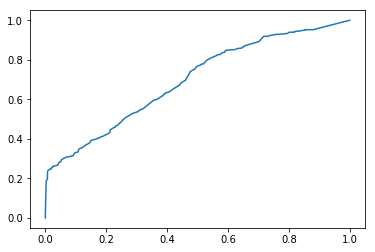

In [639]:
plt.plot(fpr,tpr)

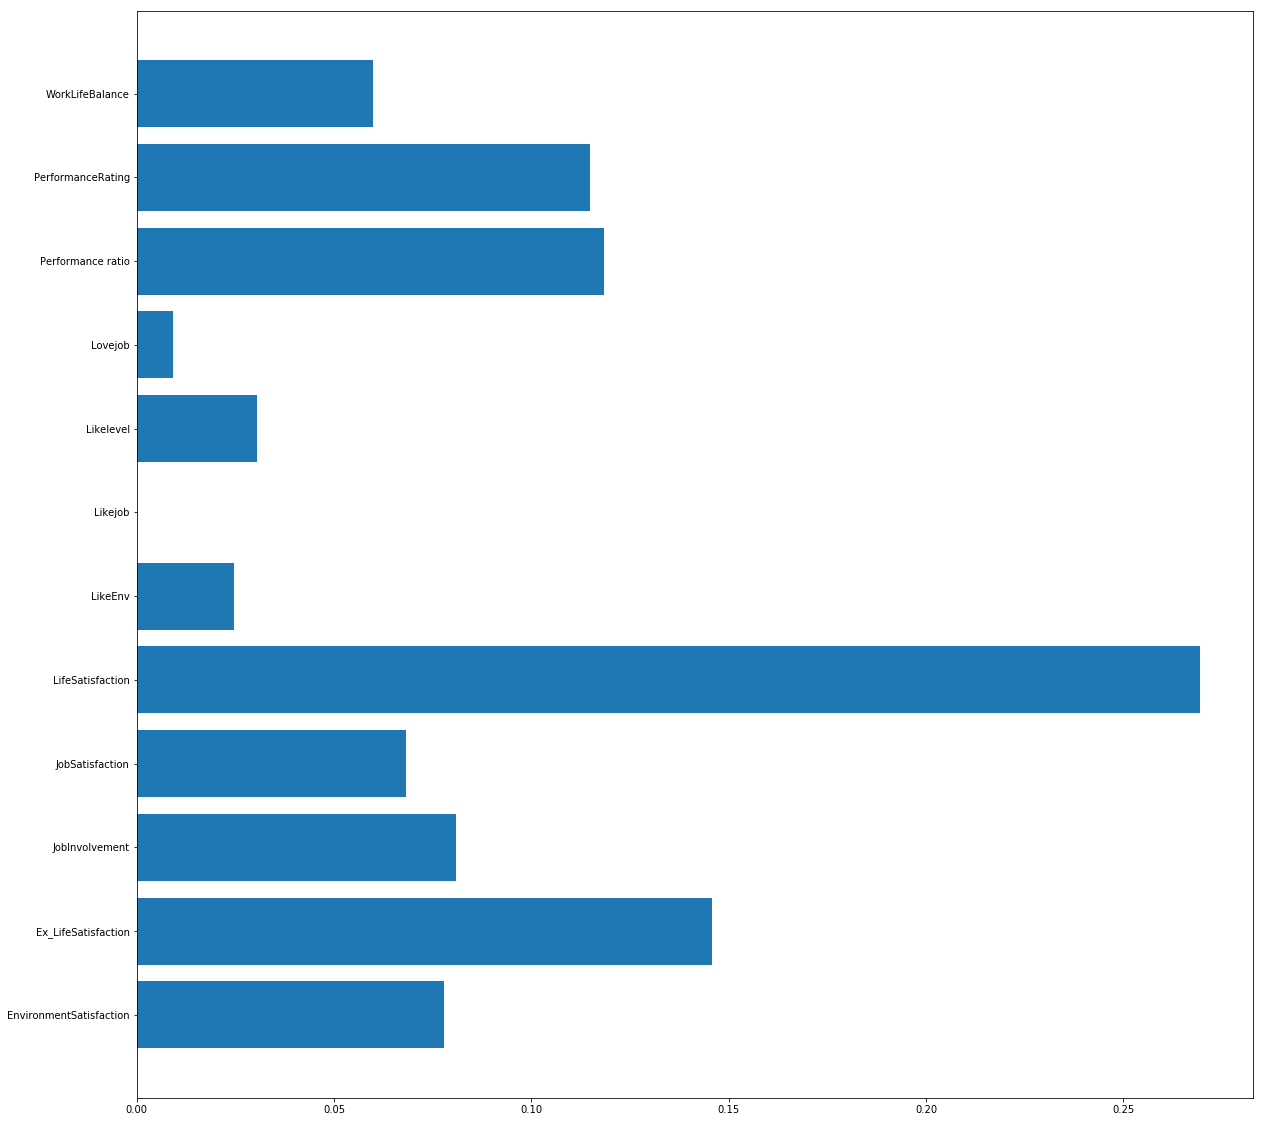

In [640]:
#Evaluate the importance of features
importance = pd.DataFrame()
i = 0
for col in X.columns:
    importance[col] = [my_model.feature_importances_[i]] #it automcatically calculates the importance. 
    i += 1
importance = importance.transpose()
importance.columns= ['Feature Importance']
plt.figure(figsize=(20, 20))
plt.barh(importance.index, importance['Feature Importance'])
plt.show()

In [641]:
#From the above, we can tell "LifeSatisfaction", "Performance ratio" are important attributes. 
#We will drop the others afterwards as they show less importance. 

#### Feature Selection by logistic regression model

In [642]:
import warnings
warnings.filterwarnings("ignore")
# import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='saga')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# change target column to array
yact = y.values.ravel()
score_cv = cross_val_score(lr, X, yact, cv=10)
score_cv.mean()

0.58088810641627542

In [643]:
pred_y = cross_val_predict(lr, X, yact, cv=10)
print(confusion_matrix(y, pred_y))

[[382 329]
 [267 444]]


In [644]:
print(classification_report(yact, pred_y))

             precision    recall  f1-score   support

          0       0.59      0.54      0.56       711
          1       0.57      0.62      0.60       711

avg / total       0.58      0.58      0.58      1422



In [645]:
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
lr.fit(X, yact)
lr.intercept_
coeff_df = pd.DataFrame(lr.coef_.flatten(), X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
PerformanceRating,0.241200
Likelevel,0.178726
WorkLifeBalance,0.143988
LikeEnv,0.059266
Likejob,0.024488
EnvironmentSatisfaction,0.000000
JobSatisfaction,0.000000
Lovejob,0.000000
Performance ratio,0.000000
JobInvolvement,-0.019499


In [646]:
#From the above, we can tell "PerformanceRating", "Likelevel","JobSatisfaction" ,"EnvironmentSatisfaction"and "JobInvolvement" are more useful attributes
#Combine with the feature selection result in decision tree, we will drop the less relevant attributes.

In [647]:
coeff_df['Coefficient']=coeff_df['Coefficient'].astype(str)
coeff_df.describe()

,Coefficient
count,12
unique,9
top,0.0
freq,4


In [648]:
# import evaluation tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
#ROC curve
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve

0.62937345827374136

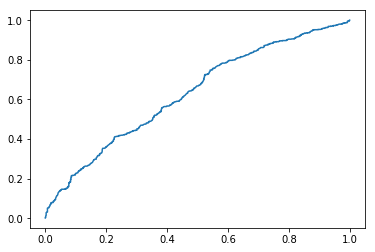

In [649]:
plt.plot(fpr,tpr)

#### Finalize the data set with selected features

In [650]:
#Create a finalized survey dataset with only important features.
#"PerformanceRating", "Likelevel","JobSatisfaction" ,"EnvironmentSatisfaction"and "JobInvolvement" 
survey_set_finalized=pd.DataFrame()
survey_set_finalized["PerformanceRating"]= survey_set["PerformanceRating"]
survey_set_finalized["Likelevel"]= survey_set["Likelevel"]
survey_set_finalized["JobSatisfaction"]= survey_set["JobSatisfaction"]
survey_set_finalized["EnvironmentSatisfaction"]= survey_set["EnvironmentSatisfaction"]
survey_set_finalized["JobInvolvement" ]= survey_set["JobInvolvement" ]
survey_set_finalized.head()

,PerformanceRating,Likelevel,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement
EmployeeID,,,,,
1,3,3,4.0,3.0,3
2,4,0,2.0,3.0,2
3,3,2,2.0,2.0,3
4,3,2,4.0,4.0,2
5,3,1,1.0,4.0,3


# Merge Datasets

In [651]:
Fulldataset =pd.concat([survey_set_finalized,general_finalized,final_df],axis=1)

In [652]:
Fulldataset.describe()

,PerformanceRating,Likelevel,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement,Y,stdz_YearsSinceLastPromotion,stdz_NumCompaniesWorked,Dpmt_HR,Single,...,stdz_YearsAtCompany,stdz_PercentSalaryHike,stdz_MonthlyIncome,stdz_DistanceFromHome,Role_SalesRep,Mean hours,Overtime,earliest intime Sd(hr),latest outtime Sd(hr),mean outtime Sd(hr)
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.00000,4410.000000,4410.000000,4.410000e+03
mean,3.153741,1.115420,2.734014,2.725170,2.729932,0.161224,0.145850,0.305901,0.042857,0.319728,...,0.175204,0.300680,0.289307,0.292590,0.056463,7.700792,0.30000,-0.778653,1.147191,9.449239e-14
std,0.360742,0.870662,1.102071,1.089852,0.711400,0.367780,0.214780,0.272908,0.202558,0.466424,...,0.153128,0.261365,0.247861,0.289465,0.230839,1.340218,0.45831,0.109812,1.348461,1.340426e+00
min,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.950504,0.00000,-1.393022,-0.875480,-1.750146e+00
25%,3.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.125000,0.000000,0.000000,...,0.075000,0.071429,0.100158,0.035714,0.000000,6.673333,0.00000,-0.841077,0.107575,-1.036523e+00
50%,3.000000,1.000000,3.000000,3.000000,3.000000,0.000000,0.066667,0.250000,0.000000,0.000000,...,0.125000,0.214286,0.205898,0.214286,0.000000,7.406761,0.00000,-0.766355,0.874381,-2.924512e-01
75%,3.000000,2.000000,4.000000,4.000000,3.000000,0.000000,0.200000,0.500000,0.000000,1.000000,...,0.225000,0.500000,0.388152,0.464286,0.000000,8.368703,1.00000,-0.700591,1.786186,6.603230e-01
max,4.000000,3.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,11.030960,1.00000,-0.494966,4.866186,3.366508e+00


In [653]:
Fulldataset.shape

(4410, 28)

# Balancing Dataset

In [654]:
#print("Out of ", Fulldataset.shape[0], " staff, ", Fulldataset['Y'].sum(), " staff left!")

In [655]:
#sampled_stay=pd.DataFrame()
#index=Fulldataset[Fulldataset['Y']==0].index
#sampled_index=np.random.choice(index,711,replace=False) # try to get different customers without replacement
#sampled_stay=Fulldataset.loc[sampled_index,:]
#sampled_stay.head()

In [656]:
#left=pd.DataFrame()
#index_1=Fulldataset[Fulldataset['Y']==1].index
#left=Fulldataset.loc[index_1,:]
#left.head()

In [657]:
#balanced_data=sampled_stay.append(left)
#print("New data shape is: ", balanced_data.shape)
#print("Number of '1's in 'Y' column is: ", balanced_data['Y'].sum())
#balanced_data.head()

In [658]:
#balanced_data.isnull().sum()

### Shuffle the down-sampled data and slice it into train (70%)and test (30%) data

In [659]:
train, test = train_test_split(Fulldataset, test_size=0.3)

In [660]:
print("Train: ", train.shape)
print("Test: ", test.shape)
print("Total number of samples: ", train.shape[0] + test.shape[0])

Train:  (3087, 28)
Test:  (1323, 28)
Total number of samples:  4410


# Modeling

## 1st model: Decision Tree

In [661]:
# define independent variables / attirbutes / features
train_features= train.drop(['Y'],axis=1)
# define one single target variable / label
target = ['Y']

In [662]:
# get defined training dataset
X= train_features
y = train [target]


In [663]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [664]:
from sklearn.model_selection import GridSearchCV
depths = np.arange(1, 21)
num_leafs = [5, 10, 20, 50, 100]
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs}]
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 'max_leaf_nodes': [5, 10, 20, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [665]:
# find the best parameters
DTM.best_params_


{'max_depth': 15, 'max_leaf_nodes': 100}

In [666]:
my_model = DecisionTreeClassifier(max_leaf_nodes = 100, max_depth = 19, random_state=10)
my_model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

##### Evaluation by AUC and confusion matrix

In [667]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(my_model, X, y, cv=10)  
pred_y = cross_val_predict(my_model, X, y, cv=10)
yact = y.values.ravel()
proba_y = cross_val_predict(my_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.82123176068525039

In [668]:
score_cv.mean()

0.90313732149466563

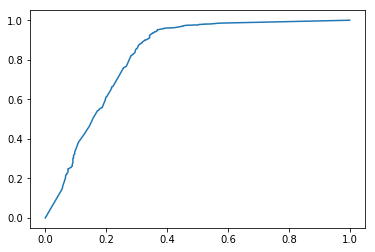

In [669]:
plt.plot(fpr,tpr)

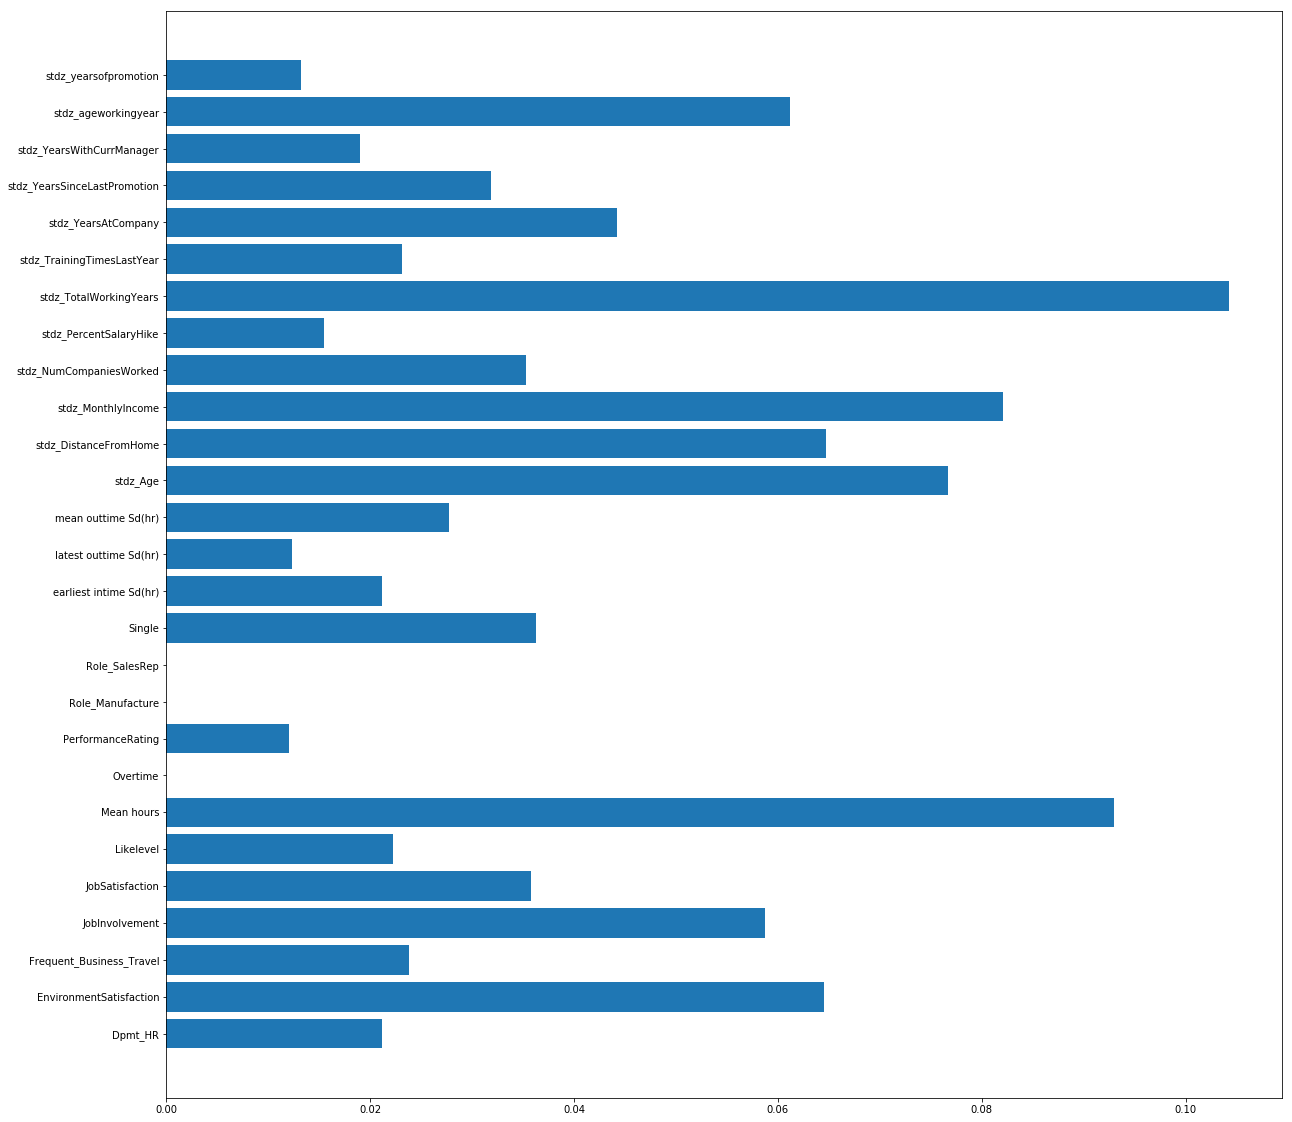

In [670]:
#Evaluate the importance of features
importance = pd.DataFrame()
i = 0
for col in X.columns:
    importance[col] = [my_model.feature_importances_[i]] #it automcatically calculates the importance. 
    i += 1
importance = importance.transpose()
importance.columns= ['Feature Importance']
plt.figure(figsize=(20, 20))
plt.barh(importance.index, importance['Feature Importance'])
plt.show()

In [671]:
importance

,Feature Importance
PerformanceRating,0.012030
Likelevel,0.022284
JobSatisfaction,0.035802
EnvironmentSatisfaction,0.064482
JobInvolvement,0.058739
stdz_YearsSinceLastPromotion,0.031865
stdz_NumCompaniesWorked,0.035340
Dpmt_HR,0.021204
Single,0.036309
Frequent_Business_Travel,0.023799


In [672]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))

[[2489  102]
 [ 197  299]]


In [673]:
print(classification_report(yact, pred_y))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94      2591
          1       0.75      0.60      0.67       496

avg / total       0.90      0.90      0.90      3087



##### Evaluate performance on test set

In [674]:
test_features= test.drop(['Y'],axis=1)
X = test_features
y = test [target] 
#from sklearn.ensemble import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [675]:
my_model = DecisionTreeClassifier(max_leaf_nodes = 100, max_depth = 19, random_state=10)
my_model.fit(X,y)
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(my_model, X, y, cv=10) #score is the accuracy rate.
pred_y = cross_val_predict(my_model, X, y, cv=10) 
yact = y.values.ravel()
proba_y = cross_val_predict(my_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.74215850894131474

In [676]:
score_cv.mean()

0.87294015747209797

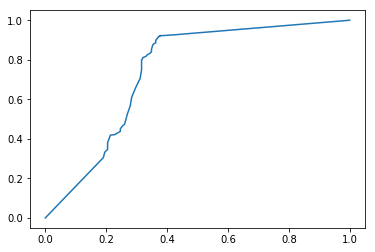

In [677]:
plt.plot(fpr,tpr)

In [678]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))

[[1022   86]
 [  82  133]]


In [679]:
print(classification_report(yact, pred_y))

             precision    recall  f1-score   support

          0       0.93      0.92      0.92      1108
          1       0.61      0.62      0.61       215

avg / total       0.87      0.87      0.87      1323



##### Evaluate performance of a full model 


In [680]:
fulldata_features= balanced_data.drop(['Y'],axis=1)
X = fulldata_features
y = balanced_data [target] 
#from sklearn.ensemble import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [681]:
my_model = DecisionTreeClassifier(max_leaf_nodes = 100, max_depth = 19, random_state=10)
my_model.fit(X,y)
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(my_model, X, y, cv=10) #score is the accuracy rate.
pred_y = cross_val_predict(my_model, X, y, cv=10) 
yact = y.values.ravel()
proba_y = cross_val_predict(my_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.87335639864614922

In [682]:
score_cv.mean()

0.85652386541471048

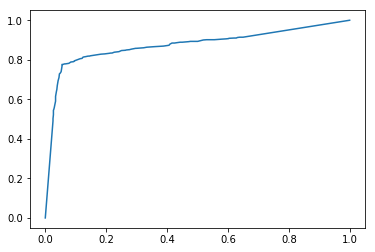

In [683]:
plt.plot(fpr,tpr)

In [684]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))

[[554 157]
 [ 47 664]]


In [685]:
print(classification_report(yact, pred_y))

             precision    recall  f1-score   support

          0       0.92      0.78      0.84       711
          1       0.81      0.93      0.87       711

avg / total       0.87      0.86      0.86      1422



## 2nd model: Logistic Regression 

In [686]:
# define attributes and target variable
train_features= train.drop(['Y'],axis=1)
target = ['Y']
X = train_features
y = train [target]

In [687]:
# import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='saga')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# change target column to array
yact = y.values.ravel()
score_cv = cross_val_score(lr, X, yact, cv=3)
score_cv.mean()

0.86168390117883564

In [688]:
pred_y = cross_val_predict(lr, X, yact, cv=10)
print(confusion_matrix(y, pred_y))

[[2525   66]
 [ 361  135]]


In [689]:
print(classification_report(yact, pred_y))

             precision    recall  f1-score   support

          0       0.87      0.97      0.92      2591
          1       0.67      0.27      0.39       496

avg / total       0.84      0.86      0.84      3087



In [690]:
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
lr.fit(X, yact)
lr.intercept_
coeff_df = pd.DataFrame(lr.coef_.flatten(), X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
stdz_YearsSinceLastPromotion,2.465493
Overtime,1.348267
stdz_NumCompaniesWorked,1.229060
Single,1.043394
Dpmt_HR,1.037126
Frequent_Business_Travel,0.929064
Likelevel,0.337138
PerformanceRating,0.136361
Mean hours,0.093136
stdz_DistanceFromHome,0.055024


In [691]:
coeff_df['Coefficient']=coeff_df['Coefficient'].astype(str)
coeff_df.describe()

,Coefficient
count,27
unique,24
top,0.0
freq,4


### Evaluation by AUC and confusion Matrix

In [692]:
# import evaluation tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
#ROC curve
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve

0.8158965276826734

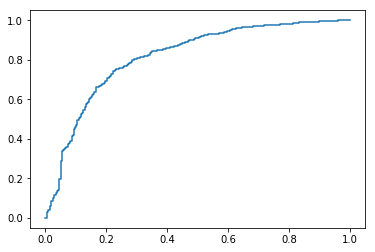

In [693]:
plt.plot(fpr,tpr)

### Evaluate performance on test set

In [694]:
test_features= test.drop(['Y'],axis=1)
X = test_features
y = test [target]
yact = y.values.ravel()
score_cv = cross_val_score(lr, X, yact, cv=10)
print(score_cv.mean())
pred_y = cross_val_predict(lr, X, yact, cv=10)
print(confusion_matrix(y, pred_y))
print(classification_report(yact, pred_y))
# probablities for each prediction
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
lr.fit(X, yact)
lr.intercept_
coeff_df = pd.DataFrame(lr.coef_.flatten(), X.columns, columns=['Coefficient'])  
coeff_df
#ROC curve
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve

0.864681220748
[[1086   22]
 [ 157   58]]
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1108
          1       0.72      0.27      0.39       215

avg / total       0.85      0.86      0.84      1323



0.79897993451431448

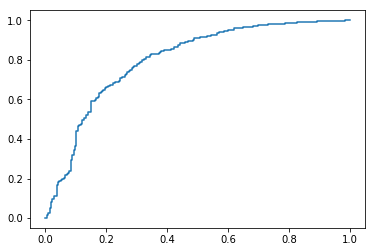

In [695]:
plt.plot(fpr,tpr)

### Evaluate performance of a full model 

In [696]:
fulldata_features= balanced_data.drop(['Y'],axis=1)
X = fulldata_features
y = balanced_data [target]
yact = y.values.ravel()
score_cv = cross_val_score(lr, X, yact, cv=10)
print(score_cv.mean())
pred_y = cross_val_predict(lr, X, yact, cv=10)
print(confusion_matrix(y, pred_y))
print(classification_report(yact, pred_y))
# probablities for each prediction
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
lr.fit(X, yact)
lr.intercept_
coeff_df = pd.DataFrame(lr.coef_.flatten(), X.columns, columns=['Coefficient'])  
coeff_df
#ROC curve
proba_y = cross_val_predict(lr, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve

0.741911189358
[[518 193]
 [174 537]]
             precision    recall  f1-score   support

          0       0.75      0.73      0.74       711
          1       0.74      0.76      0.75       711

avg / total       0.74      0.74      0.74      1422



0.80575881120665616

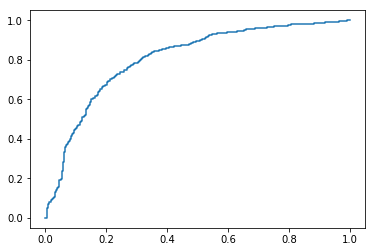

In [697]:
plt.plot(fpr,tpr)

## 3rd model: Random Forest Classifer 

In [698]:
# get defined training dataset
X= train_features
y = train [target]

In [699]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
depths = np.arange(1, 21)
num_leafs = [5, 10, 20, 50, 100]
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs,'n_estimators': [50, 100, 200]}]
DTM = GridSearchCV(RandomForestClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)
# find the best parameters
DTM.best_params_

{'max_depth': 17, 'max_leaf_nodes': 100, 'n_estimators': 200}

In [700]:
forest_model = RandomForestClassifier(max_leaf_nodes = 100, max_depth = 16,n_estimators=200, random_state=10)
forest_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [701]:
# Return the feature importances (the higher, the more important the feature)
print(forest_model.feature_importances_)

[ 0.0044733   0.01640778  0.02616596  0.04561359  0.02173723  0.02225669
  0.0324638   0.01231036  0.03693885  0.02768046  0.05546255  0.00304839
  0.04469533  0.02183307  0.08074546  0.07772426  0.0337952   0.05737929
  0.03592195  0.06066031  0.04241441  0.00458992  0.07442298  0.01065591
  0.0259024   0.05618705  0.06851349]


### Evaluation by AUC and Confusion Matrix







In [702]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(forest_model, X, y, cv=10)  
pred_y = cross_val_predict(forest_model, X, y, cv=10)
yact = y.values.ravel()
proba_y = cross_val_predict(forest_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.95932337122296796

In [703]:
score_cv.mean()

0.91447994327418058

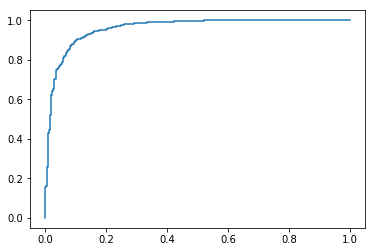

In [704]:
plt.plot(fpr,tpr)

In [705]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))
print(classification_report(yact, pred_y))

[[2586    5]
 [ 259  237]]
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      2591
          1       0.98      0.48      0.64       496

avg / total       0.92      0.91      0.90      3087



### Evaluate performance on test set

In [706]:
X = test_features
y = test [target] 

In [707]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(max_leaf_nodes = 100, max_depth = 16,n_estimators=200, random_state=10)
forest_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [708]:
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(forest_model, X, y, cv=10) #score is the accuracy rate.
pred_y = cross_val_predict(forest_model, X, y, cv=10) 
yact = y.values.ravel()
proba_y = cross_val_predict(forest_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.89738896818067326

In [709]:
score_cv.mean()

0.90247552434173561

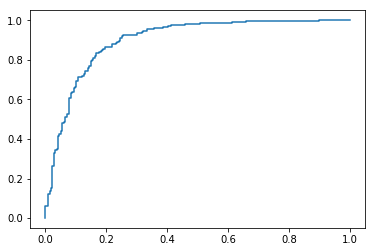

In [710]:
plt.plot(fpr,tpr)

In [711]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))
print(classification_report(yact, pred_y))

[[1088   20]
 [ 109  106]]
             precision    recall  f1-score   support

          0       0.91      0.98      0.94      1108
          1       0.84      0.49      0.62       215

avg / total       0.90      0.90      0.89      1323



### Evaluate performance of a full model 

In [712]:
X = fulldata_features
y = balanced_data [target]
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(max_leaf_nodes = 100, max_depth = 16,n_estimators=200, random_state=10)
forest_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [713]:
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(forest_model, X, y, cv=10) #score is the accuracy rate.
pred_y = cross_val_predict(forest_model, X, y, cv=10) 
yact = y.values.ravel()
proba_y = cross_val_predict(forest_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.96608449500614224

In [714]:
score_cv.mean()

0.90506651017214401

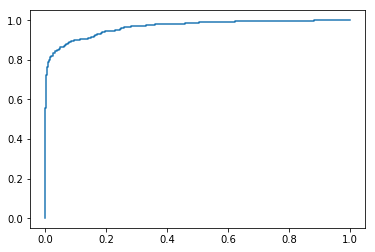

In [715]:
plt.plot(fpr,tpr)

In [716]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))

[[607 104]
 [ 31 680]]


In [717]:
print(classification_report(yact, pred_y))

             precision    recall  f1-score   support

          0       0.95      0.85      0.90       711
          1       0.87      0.96      0.91       711

avg / total       0.91      0.91      0.90      1422



## 4th model: Adaboost Model

In [718]:
from sklearn.ensemble import AdaBoostClassifier

In [719]:
# get defined training dataset
X= train_features
y = train [target]

In [720]:
try_grid = [{'n_estimators': [50, 100, 200],'learning_rate':[0.5,0.7,1]}]
DTM = GridSearchCV(AdaBoostClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)
# find the best parameters
DTM.best_params_

{'learning_rate': 0.7, 'n_estimators': 200}

In [721]:
# Create adaboost classifer object
adaboost_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.7)
adaboost_model.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=200, random_state=None)

### Evaluation by AUC and Confusion Matrix

In [722]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(adaboost_model, X, y, cv=10)  
pred_y = cross_val_predict(adaboost_model, X, y, cv=10)
yact = y.values.ravel()
proba_y = cross_val_predict(adaboost_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.85898068375642733

In [723]:
score_cv.mean()

0.87334170527249133

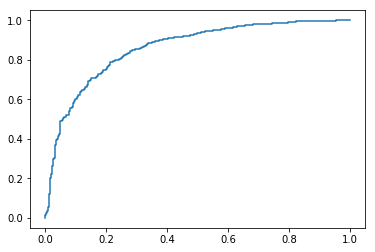

In [724]:
plt.plot(fpr,tpr)

In [725]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))
print(classification_report(yact, pred_y))

[[2512   79]
 [ 312  184]]
             precision    recall  f1-score   support

          0       0.89      0.97      0.93      2591
          1       0.70      0.37      0.48       496

avg / total       0.86      0.87      0.86      3087



### Evaluate performance on test set

In [726]:
X = test_features
y = test [target] 

In [727]:
adaboost_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.7)
adaboost_model.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=200, random_state=None)

In [728]:
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(adaboost_model, X, y, cv=10) #score is the accuracy rate.
pred_y = cross_val_predict(adaboost_model, X, y, cv=10) 
yact = y.values.ravel()
proba_y = cross_val_predict(adaboost_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.79392578288976579

In [729]:
score_cv.mean()

0.85486130315379005

In [730]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))
print(classification_report(yact, pred_y))

[[1056   52]
 [ 140   75]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.92      1108
          1       0.59      0.35      0.44       215

avg / total       0.84      0.85      0.84      1323



### Evaluate performance of a full model


In [731]:
X = fulldata_features
y = balanced_data [target]
adaboost_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.7)
adaboost_model.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=200, random_state=None)

In [732]:
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(adaboost_model, X, y, cv=10) #score is the accuracy rate.
pred_y = cross_val_predict(adaboost_model, X, y, cv=10) 
yact = y.values.ravel()
proba_y = cross_val_predict(adaboost_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.83825597749648373

In [733]:
score_cv.mean()

0.76574726134585291

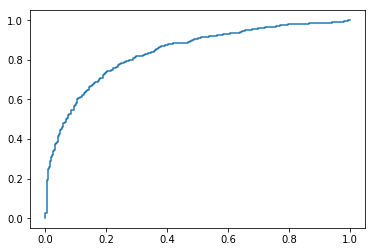

In [734]:
plt.plot(fpr,tpr)

In [735]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))

[[537 174]
 [159 552]]


In [736]:
print(classification_report(yact, pred_y))

             precision    recall  f1-score   support

          0       0.77      0.76      0.76       711
          1       0.76      0.78      0.77       711

avg / total       0.77      0.77      0.77      1422



## 5th model: KNN

In [737]:
# Import KNeighborsClassifier Model from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [738]:
X= train_features
y = train [target]

In [739]:
# try all the values of 'k' from 1 to 13
for k in range(1, 14):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    accuracy = cross_val_score(model,X,y,cv=10).mean()
    print("When k=%d, accuracy=%.3f" % (k, accuracy))

When k=1, accuracy=0.974
When k=2, accuracy=0.923
When k=3, accuracy=0.900
When k=4, accuracy=0.855
When k=5, accuracy=0.843
When k=6, accuracy=0.857
When k=7, accuracy=0.858
When k=8, accuracy=0.853
When k=9, accuracy=0.850
When k=10, accuracy=0.849
When k=11, accuracy=0.848
When k=12, accuracy=0.846
When k=13, accuracy=0.846


In [740]:
knn_model = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

### Evaluation by AUC and Confusion Matrix

In [741]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(knn_model, X, y, cv=10)  
pred_y = cross_val_predict(knn_model, X, y, cv=10)
yact = y.values.ravel()
proba_y = cross_val_predict(knn_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.95556151255586963

In [742]:
score_cv.mean()

0.9718215102571508

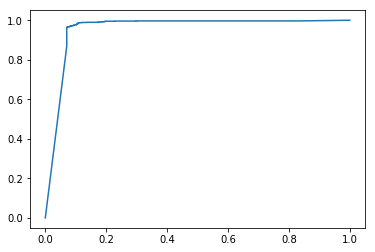

In [743]:
plt.plot(fpr,tpr)

In [744]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))
print(classification_report(yact, pred_y))

[[2559   32]
 [  55  441]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2591
          1       0.93      0.89      0.91       496

avg / total       0.97      0.97      0.97      3087



### Evaluate performance on test set

In [745]:
X = test_features
y = test [target]

In [746]:
knn_model = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [747]:
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(knn_model, X, y, cv=10) #score is the accuracy rate.
pred_y = cross_val_predict(knn_model, X, y, cv=10) 
yact = y.values.ravel()
proba_y = cross_val_predict(knn_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.84209973973637808

In [748]:
score_cv.mean()

0.90022575522776405

In [749]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))
print(classification_report(yact, pred_y))

[[1057   51]
 [  81  134]]
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1108
          1       0.72      0.62      0.67       215

avg / total       0.90      0.90      0.90      1323



### Evaluate performance of a full model

In [750]:
X = fulldata_features
y = balanced_data [target]
knn_model = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [751]:
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
score_cv = cross_val_score(knn_model, X, y, cv=10) #score is the accuracy rate.
pred_y = cross_val_predict(knn_model, X, y, cv=10) 
yact = y.values.ravel()
proba_y = cross_val_predict(knn_model, X, yact, cv=10, method='predict_proba')
proba_y_0 = proba_y[:,0]
proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)
metrics.auc(fpr, tpr) #area under the ROC curve 

0.92379446155550404

In [752]:
score_cv.mean()

0.88116197183098577

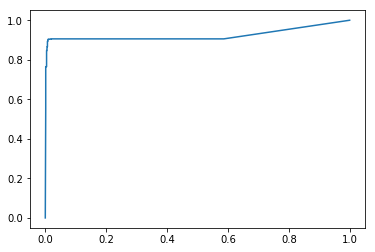

In [753]:
plt.plot(fpr,tpr)

In [754]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_y))

[[543 168]
 [  1 710]]


In [755]:
print(classification_report(yact, pred_y))

             precision    recall  f1-score   support

          0       1.00      0.76      0.87       711
          1       0.81      1.00      0.89       711

avg / total       0.90      0.88      0.88      1422



## 6th model: Emsemble learning: Voting Classifier 

In [756]:
from sklearn.ensemble import VotingClassifier

In [757]:
#create a dictionary of our models
estimators=[('decision_tree',my_model),('logistic_regression', lr), ('random_forest', forest_model), ('knn', knn_model),('adaboost',adaboost_model)]

In [758]:
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [759]:
#fit model to training data
ensemble.fit(X, y)

VotingClassifier(estimators=[('decision_tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fract...='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=200, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [760]:
#Evaluate the importance of features
importance = pd.DataFrame()
i = 0
for col in X.columns:
    importance[col] = [ensemble.feature_importances_[i]] #it automcatically calculates the importance. 
    i += 1
importance = importance.transpose()
importance.columns= ['Feature Importance']
plt.figure(figsize=(20, 20))
plt.barh(importance.index, importance['Feature Importance'])
plt.show()

AttributeError: 'VotingClassifier' object has no attribute 'feature_importances_'

# Training data 

In [761]:
# get defined training dataset
X= train_features
y = train[target]
Accuracy_ensemble = cross_val_score (ensemble,X,y,cv=10).mean()
Accuracy_ensemble
#The accuracy increases by combining all five models.

0.9173957371577165

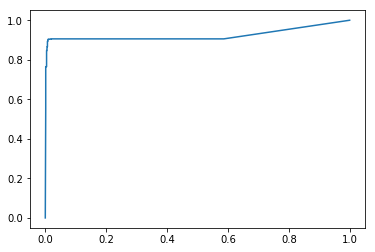

In [ ]:
plt.plot(fpr,tpr)

# Test Data

In [ ]:
X= test_features
y = test[target]
Accuracy_ensemble = cross_val_score (ensemble,X,y,cv=10).mean()
Accuracy_ensemble
#The accuracy increases by combining all five models.

0.90622353072132111

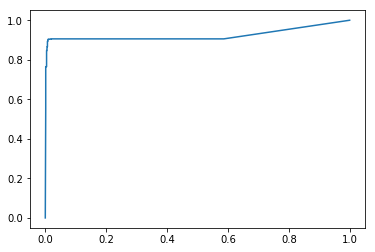

In [ ]:
plt.plot(fpr,tpr)

# Full Data

In [ ]:
X = fulldata_features
y = balanced_data [target]
Accuracy_ensemble = cross_val_score (ensemble,X,y,cv=10).mean()
Accuracy_ensemble
#The accuracy increases by combining all five models.

0.89100156494522698

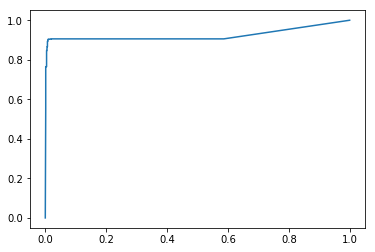

In [ ]:
plt.plot(fpr,tpr)